# 3. Model Training 

In [ ]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

import sys  
sys.path.insert(1, '../src/user_identification')

from train_model import ClassifierEvaluator
from visualize import VisualizationUtils
import seaborn as sns
# import shap for ai explainability
import shap

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import tree

# import warnings to hide the unnessairy warniings
import warnings
warnings.filterwarnings('ignore')

c:\Users\Benhamadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mov_slow = pd.read_csv('../data/processed/movement_slow_stat_cleaned.csv').drop(columns=['Unnamed: 0']).fillna(0)
mov_fast = pd.read_csv('../data/processed/movement_fast_stat_cleaned.csv').drop(columns=['Unnamed: 0']).fillna(0)
traffic_slow = pd.read_csv('../data/processed/traffic_slow_stat_cleaned.csv', index_col=0).fillna(0)
traffic_fast = pd.read_csv('../data/processed/traffic_fast_stat_cleaned.csv', index_col=0).fillna(0)

## 3.1. Movement Data
### 3.1.1. Training On Cooking Similator

In [3]:
# Concatenate movement and traffic data for both slow and fast datasets
mov_combined = pd.concat([mov_slow, traffic_slow.drop(columns=['time_interval','ID'])], axis=1).dropna()
fast_combined = pd.concat([mov_fast, traffic_fast.drop(columns=['time_interval','ID'])], axis=1).dropna()

In [4]:
evaluator = ClassifierEvaluator()
X, y, fX, fy, X_train, y_train, X_test, y_test, fX_train, fy_train, fX_test, fy_test = evaluator.split_data(mov_combined, fast_combined, id_range=range(0,30), train_minutes=8, test_minutes=2)

Size of the training set:  (1437, 490)
Size of the slow testing set:  (360, 490)
Size of the fast training set:  (1440, 490)
Size of the fast testing set:  (360, 490)


In [5]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast, best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(X_train,y_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Slow)').style.background_gradient(cmap= plt.cm.Blues)

100%|██████████| 15/15 [06:03<00:00, 24.25s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
7,AdaBoostClassifier,0.041754,0.044444,0.033333,0.012068,0.016416,0.006274,0.014134,0.020282,0.009425,0.041667,0.044444,0.033333,3.327380,3.276759,4.419064
11,BernoulliNB,0.130828,0.072222,0.072222,0.129862,0.024559,0.037411,0.739308,0.021769,0.029147,0.130602,0.072222,0.072222,3.243269,3.372645,3.898921
9,QuadraticDiscriminantAnalysis,1.000000,0.091667,0.044444,1.000000,0.085985,0.040447,1.000000,0.089568,0.039526,1.000000,0.091667,0.044444,0.000000,32.739652,34.441713
0,SVC,0.617258,0.483333,0.111111,0.595067,0.446300,0.053964,0.654711,0.556004,0.037630,0.615972,0.483333,0.111111,3.409392,3.407590,3.401740
4,KNeighborsClassifier,0.895616,0.636111,0.094444,0.894285,0.616265,0.047534,0.904976,0.672777,0.062467,0.895741,0.636111,0.094444,0.263105,7.296952,28.491934
3,DecisionTreeClassifier,1.000000,0.730556,0.186111,1.000000,0.710146,0.143416,1.000000,0.744920,0.133661,1.000000,0.730556,0.186111,0.000000,9.711762,29.335529
8,GaussianNB,0.891441,0.747222,0.033333,0.889427,0.755140,0.002210,0.899744,0.793246,0.001143,0.891435,0.747222,0.033333,3.097500,7.855881,34.842198
6,MLPClassifier,0.986778,0.786111,0.091667,0.986725,0.772847,0.050349,0.986993,0.788283,0.045525,0.986806,0.786111,0.091667,0.115151,0.701266,12.023868
10,LogisticRegression,0.983994,0.802778,0.105556,0.983929,0.790509,0.049526,0.984351,0.798653,0.091827,0.984028,0.802778,0.105556,0.252338,0.714955,6.582691
12,BaggingClassifier,0.998608,0.813889,0.191667,0.998611,0.809094,0.153957,0.998639,0.842788,0.168572,0.998611,0.813889,0.191667,0.088786,2.485373,17.085208


In [6]:
explainer = shap.TreeExplainer(best_model_slow)
shap_values_slow = explainer.shap_values(X_test)

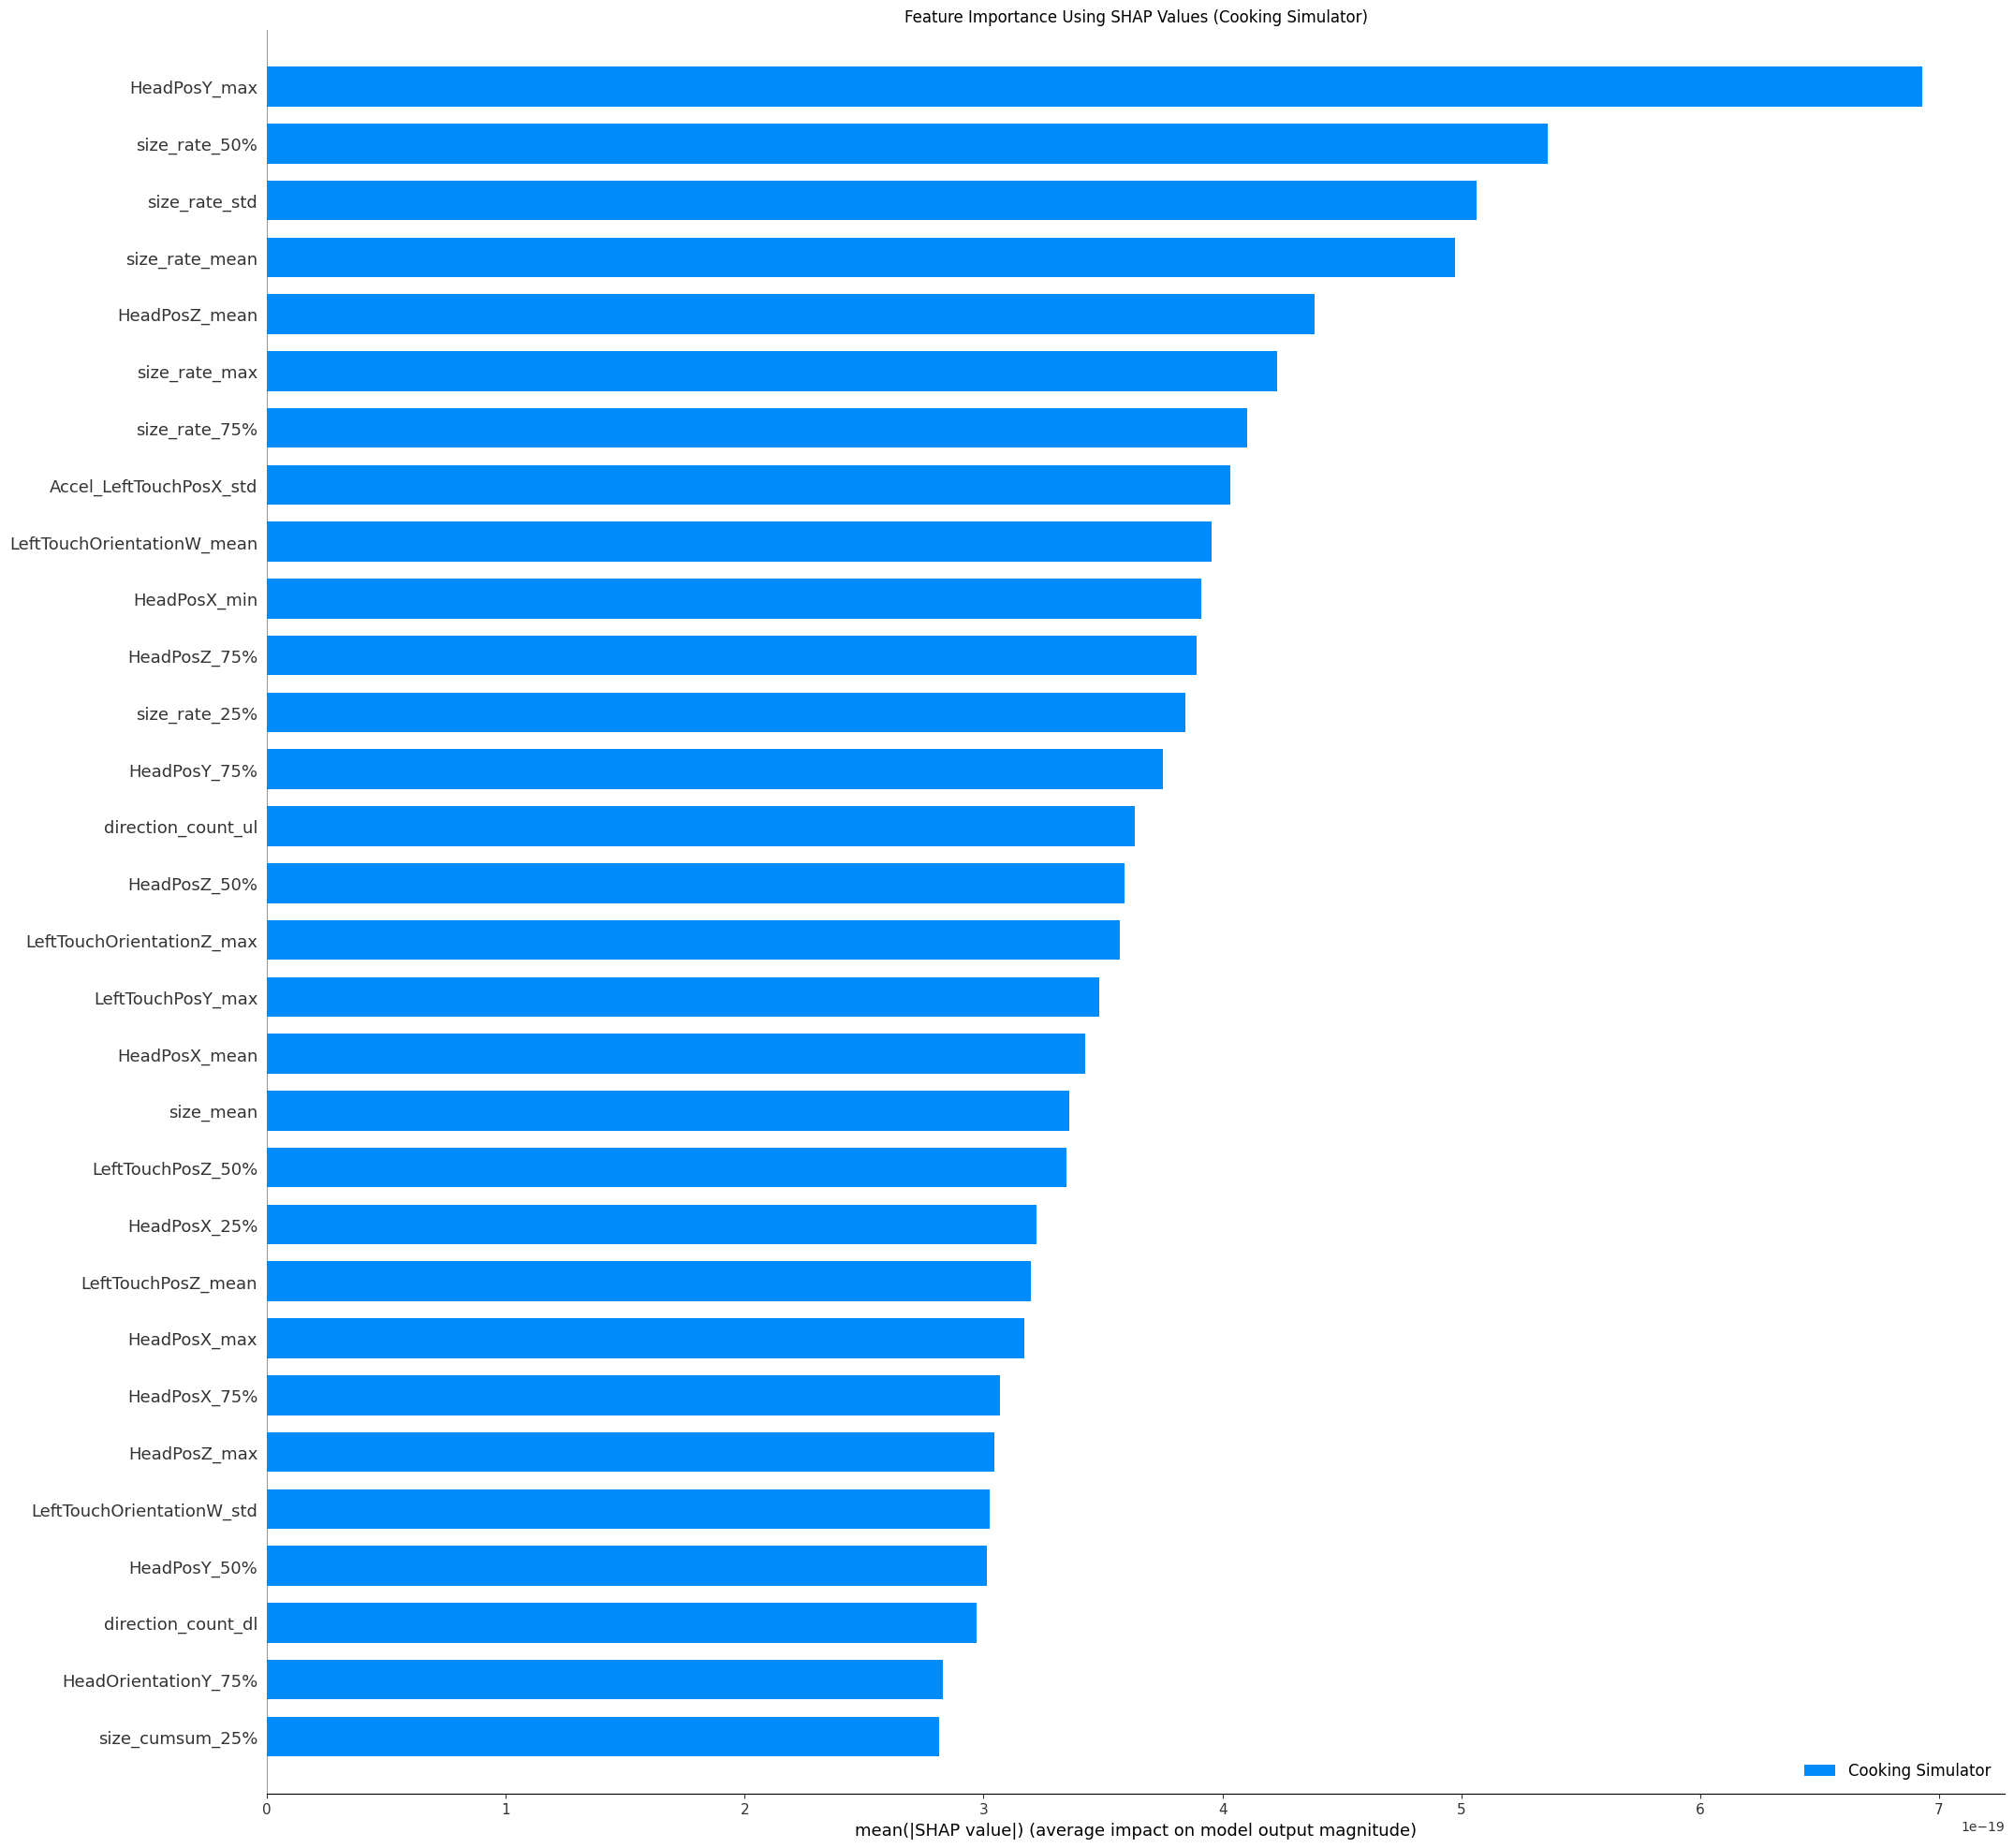

In [7]:
VisualizationUtils.shap_plotter([np.mean(shap_values_slow, axis=2)], 
                          X_test, title="Feature Importance Using SHAP Values (Cooking Simulator)",
                          class_names=['Cooking Simulator'])

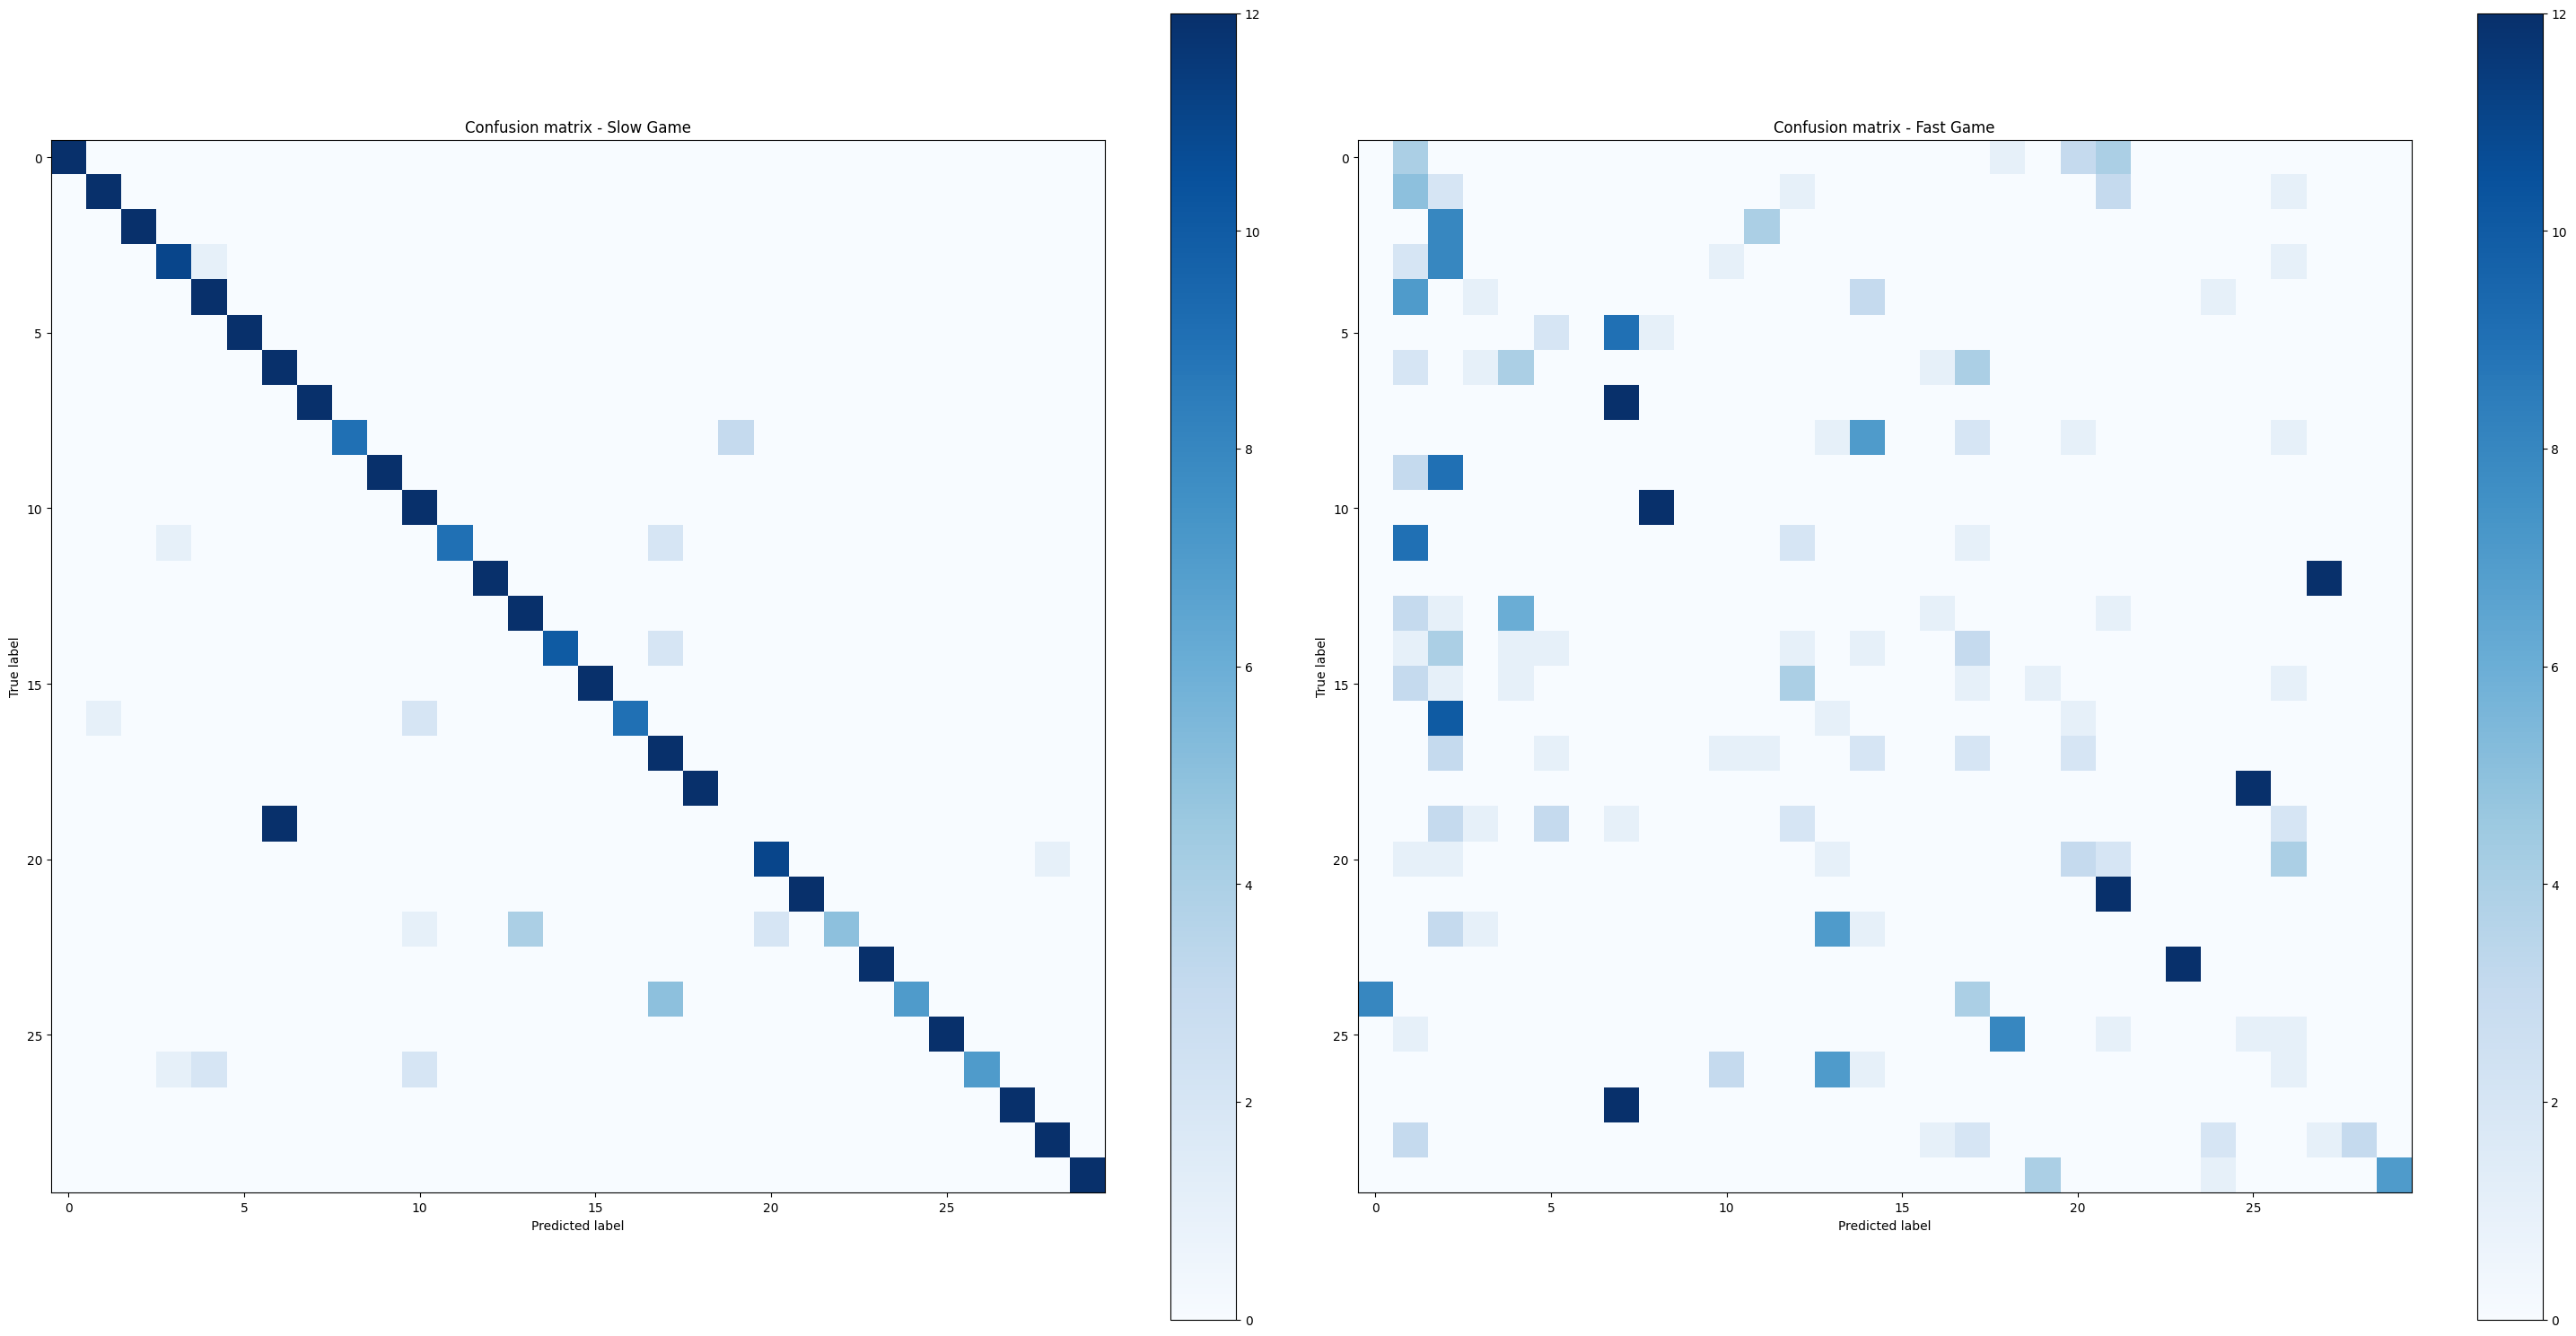

In [8]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

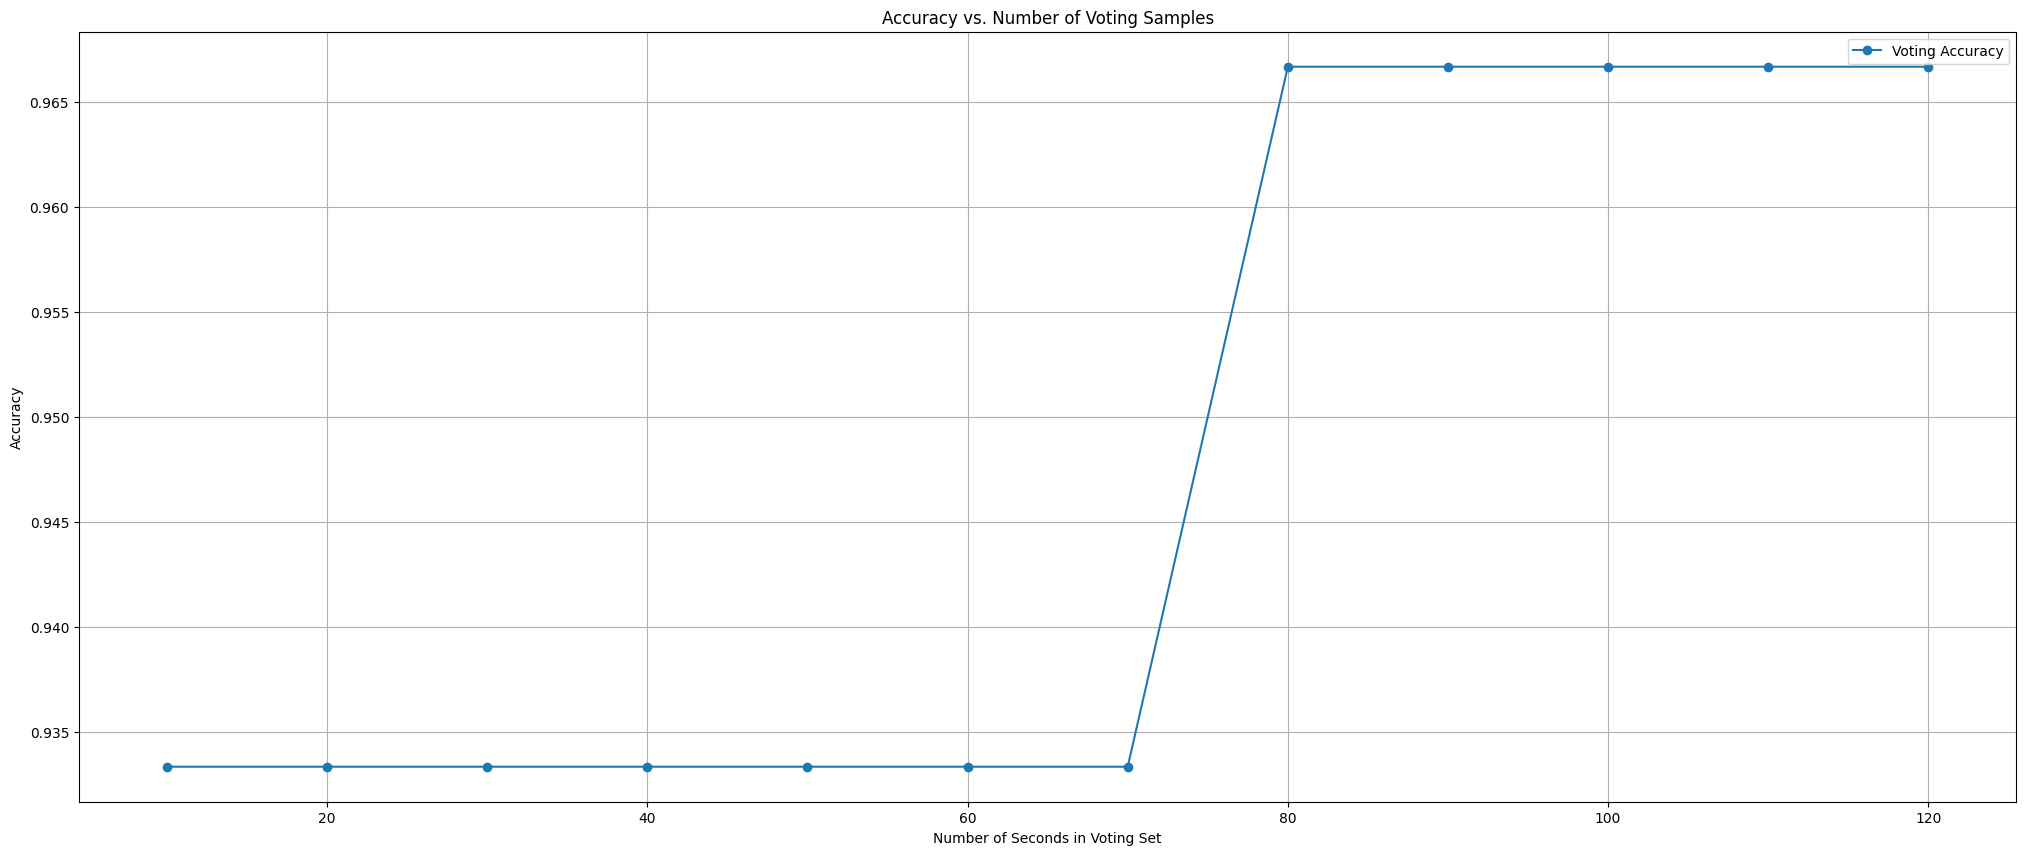


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,0.933333
1,20,0.933333
2,30,0.933333
3,40,0.933333
4,50,0.933333
5,60,0.933333
6,70,0.933333
7,80,0.966667
8,90,0.966667
9,100,0.966667


In [9]:
evaluator.plot_accuracy_by_vote(best_model_slow, X_test, y_test, increment=1)

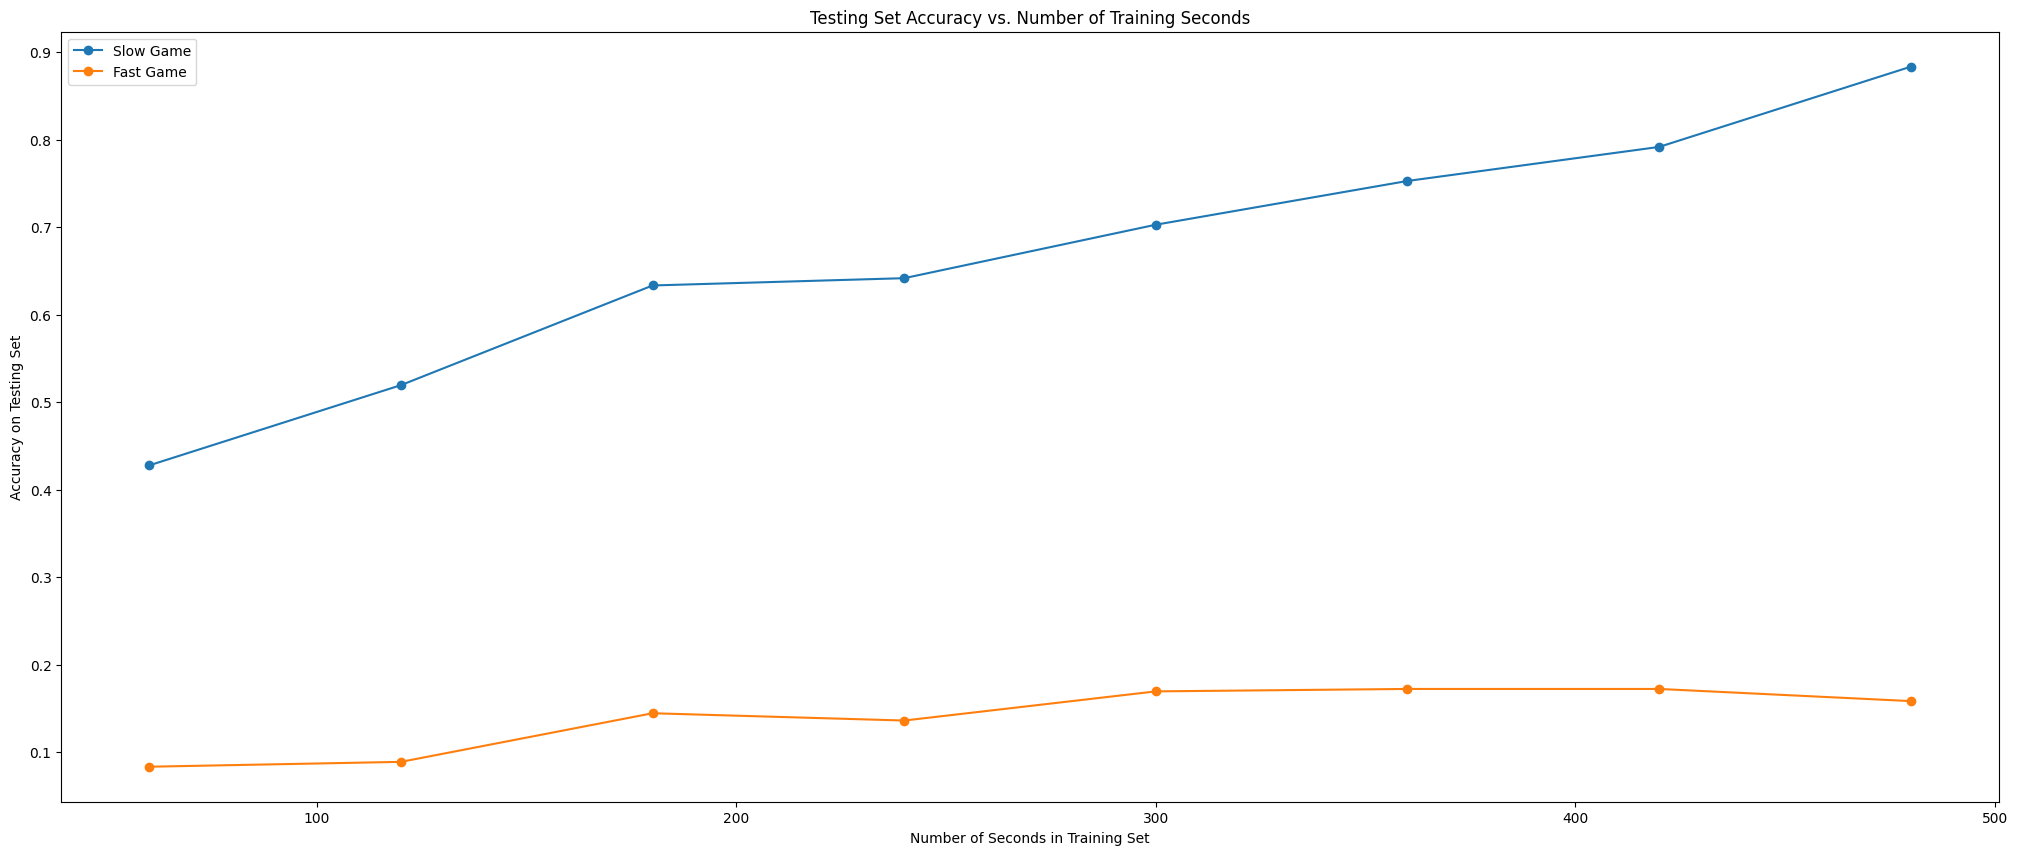


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.427778,0.083333
1,120,0.519444,0.088889
2,180,0.633333,0.144444
3,240,0.641667,0.136111
4,300,0.702778,0.169444
5,360,0.752778,0.172222
6,420,0.791667,0.172222
7,480,0.883333,0.158333


In [10]:
evaluator.accuracy_over_time(X, y,best_model_slow_name, range(1,9), X_test, y_test, fX_test, fy_test)

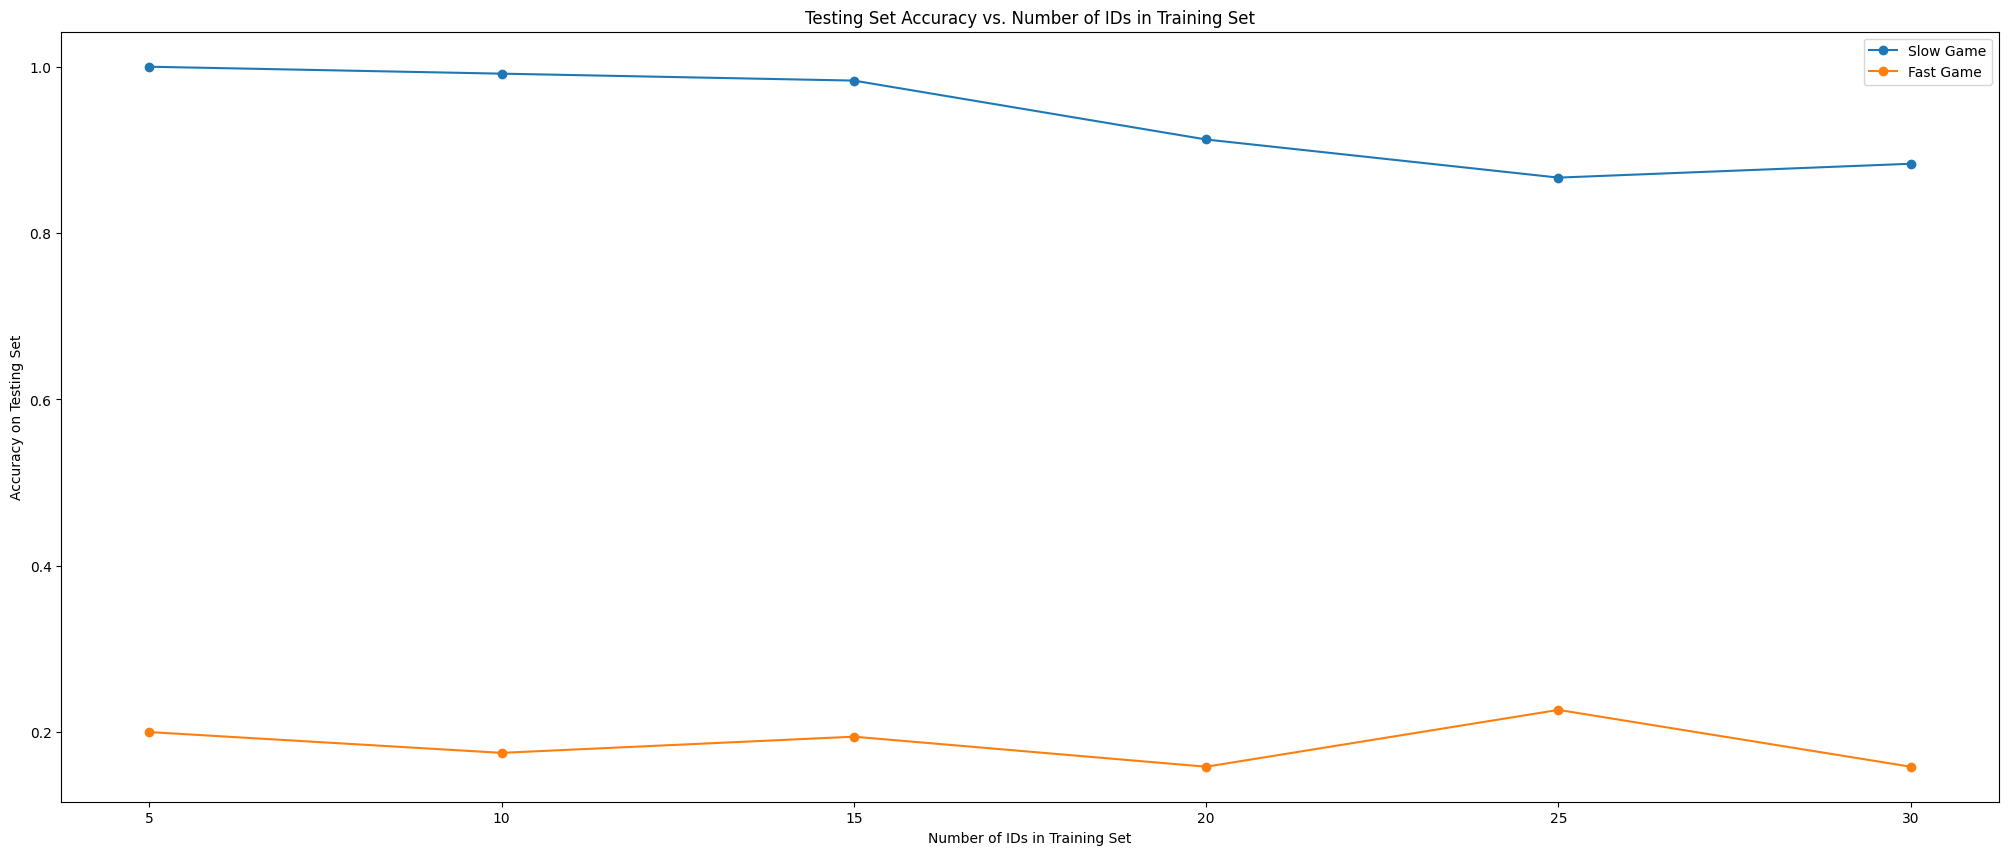


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,1.000000,0.200000
1,10,0.991667,0.175000
2,15,0.983333,0.194444
3,20,0.912500,0.158333
4,25,0.866667,0.226667
5,30,0.883333,0.158333


In [11]:
evaluator.accuracy_over_ids(X_train, y_train, best_model_slow_name,  X_test, y_test,fX_test, fy_test)

### 3.1.2. Training On Beat Saber

In [12]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast,  best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(fX_train,fy_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Fast)').style.background_gradient(cmap= plt.cm.Blues)

100%|██████████| 15/15 [06:02<00:00, 24.17s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
9,QuadraticDiscriminantAnalysis,1.000000,0.044444,0.097222,1.000000,0.041918,0.097820,1.000000,0.044633,0.116815,1.000000,0.044444,0.097222,0.000000,34.441713,32.539409
7,AdaBoostClassifier,0.233333,0.127778,0.230556,0.142398,0.088915,0.141714,0.112963,0.111803,0.112946,0.233333,0.127778,0.230556,2.316441,4.860650,2.403155
11,BernoulliNB,0.243750,0.066667,0.241667,0.251351,0.024047,0.207399,0.436436,0.045810,0.205913,0.243750,0.066667,0.241667,2.676128,3.852145,2.913479
0,SVC,0.682639,0.055556,0.675000,0.680918,0.035556,0.656630,0.746738,0.048677,0.663755,0.682639,0.055556,0.675000,3.387392,3.399027,3.385293
4,KNeighborsClassifier,0.903472,0.072222,0.780556,0.903761,0.056424,0.770325,0.908355,0.080606,0.797839,0.903472,0.072222,0.780556,0.311473,30.789691,2.685408
8,GaussianNB,0.981944,0.186111,0.830556,0.981794,0.152431,0.823357,0.983302,0.254720,0.897208,0.981944,0.186111,0.830556,0.522590,28.972871,5.711350
3,DecisionTreeClassifier,1.000000,0.188889,0.869444,1.000000,0.160255,0.852304,1.000000,0.182382,0.877501,1.000000,0.188889,0.869444,0.000000,29.235408,4.705699
6,MLPClassifier,0.995139,0.108333,0.886111,0.995145,0.113293,0.884863,0.995251,0.165295,0.920491,0.995139,0.108333,0.886111,0.067286,6.777563,0.398180
10,LogisticRegression,0.992361,0.077778,0.922222,0.992359,0.080960,0.916279,0.992567,0.127859,0.942175,0.992361,0.077778,0.922222,0.199061,4.467999,0.382606
12,BaggingClassifier,0.999306,0.211111,0.936111,0.999305,0.178712,0.935995,0.999320,0.206191,0.952892,0.999306,0.211111,0.936111,0.034197,18.895435,0.503025


In [13]:
explainer = shap.TreeExplainer(best_model_fast)
shap_values_fast = explainer.shap_values(fX_test)

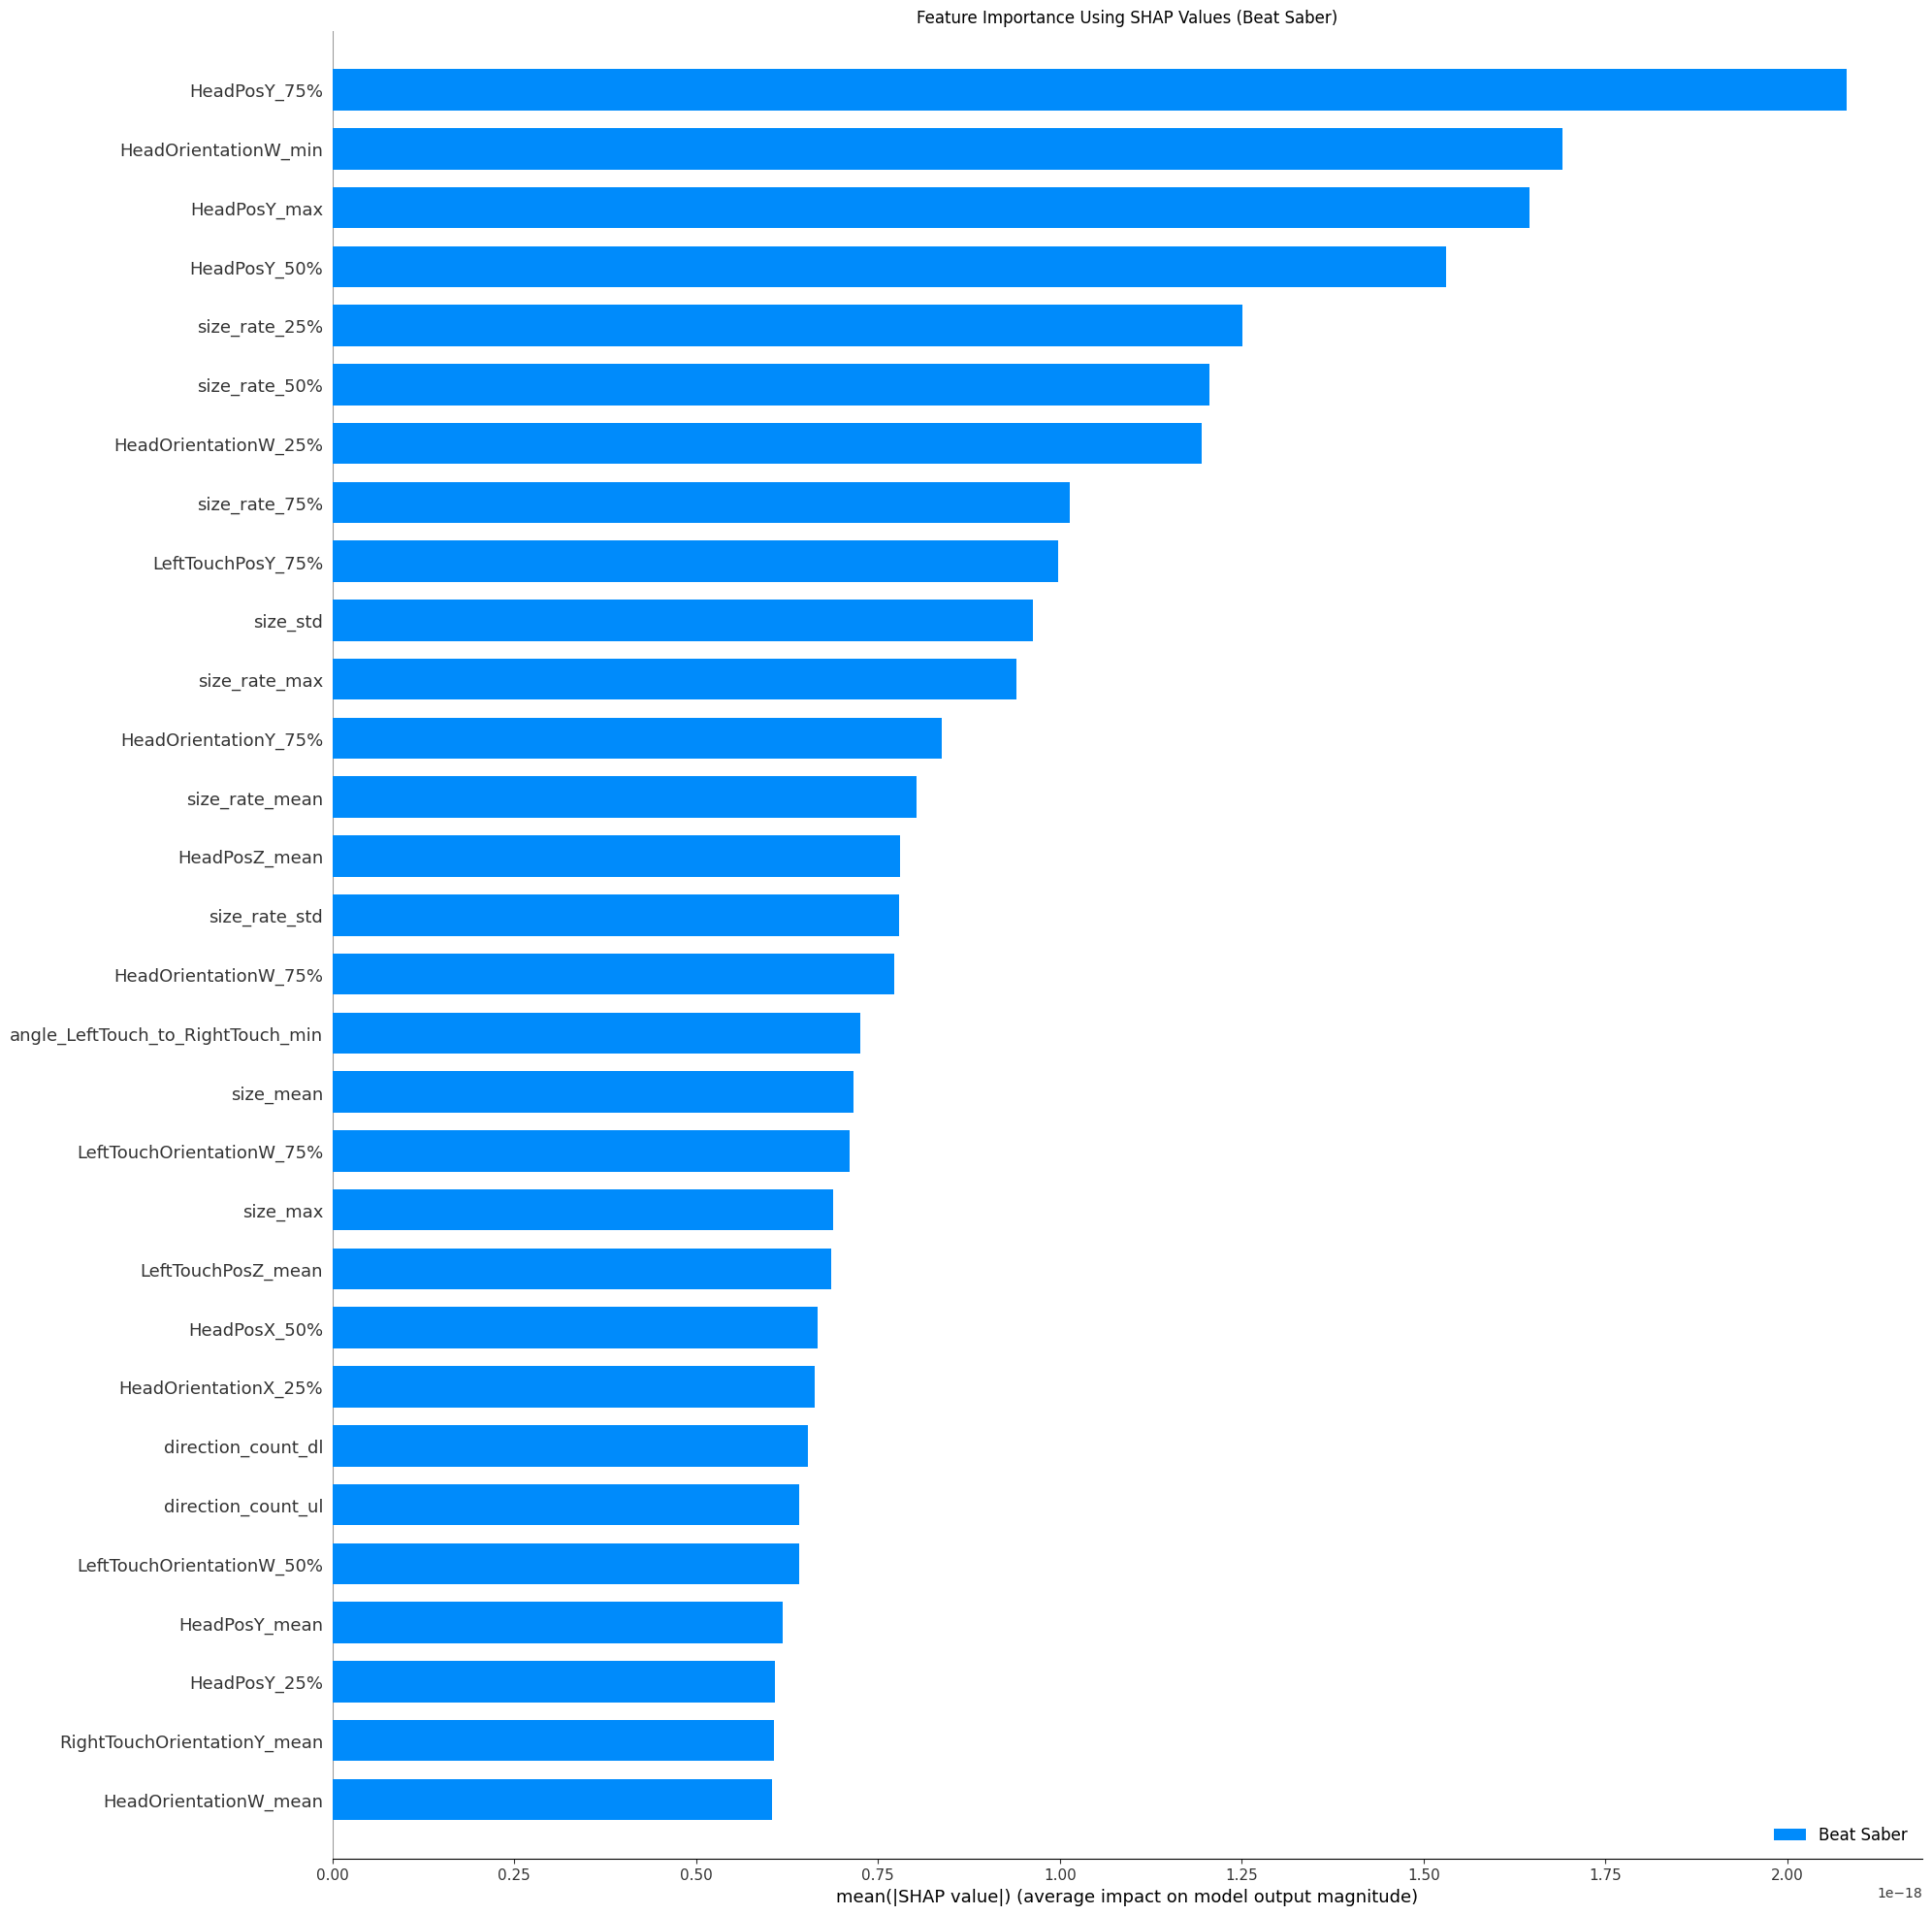

In [14]:
VisualizationUtils.shap_plotter([np.mean(shap_values_fast, axis=2)], 
                          fX_test, title="Feature Importance Using SHAP Values (Beat Saber)",
                          class_names=['Beat Saber'])

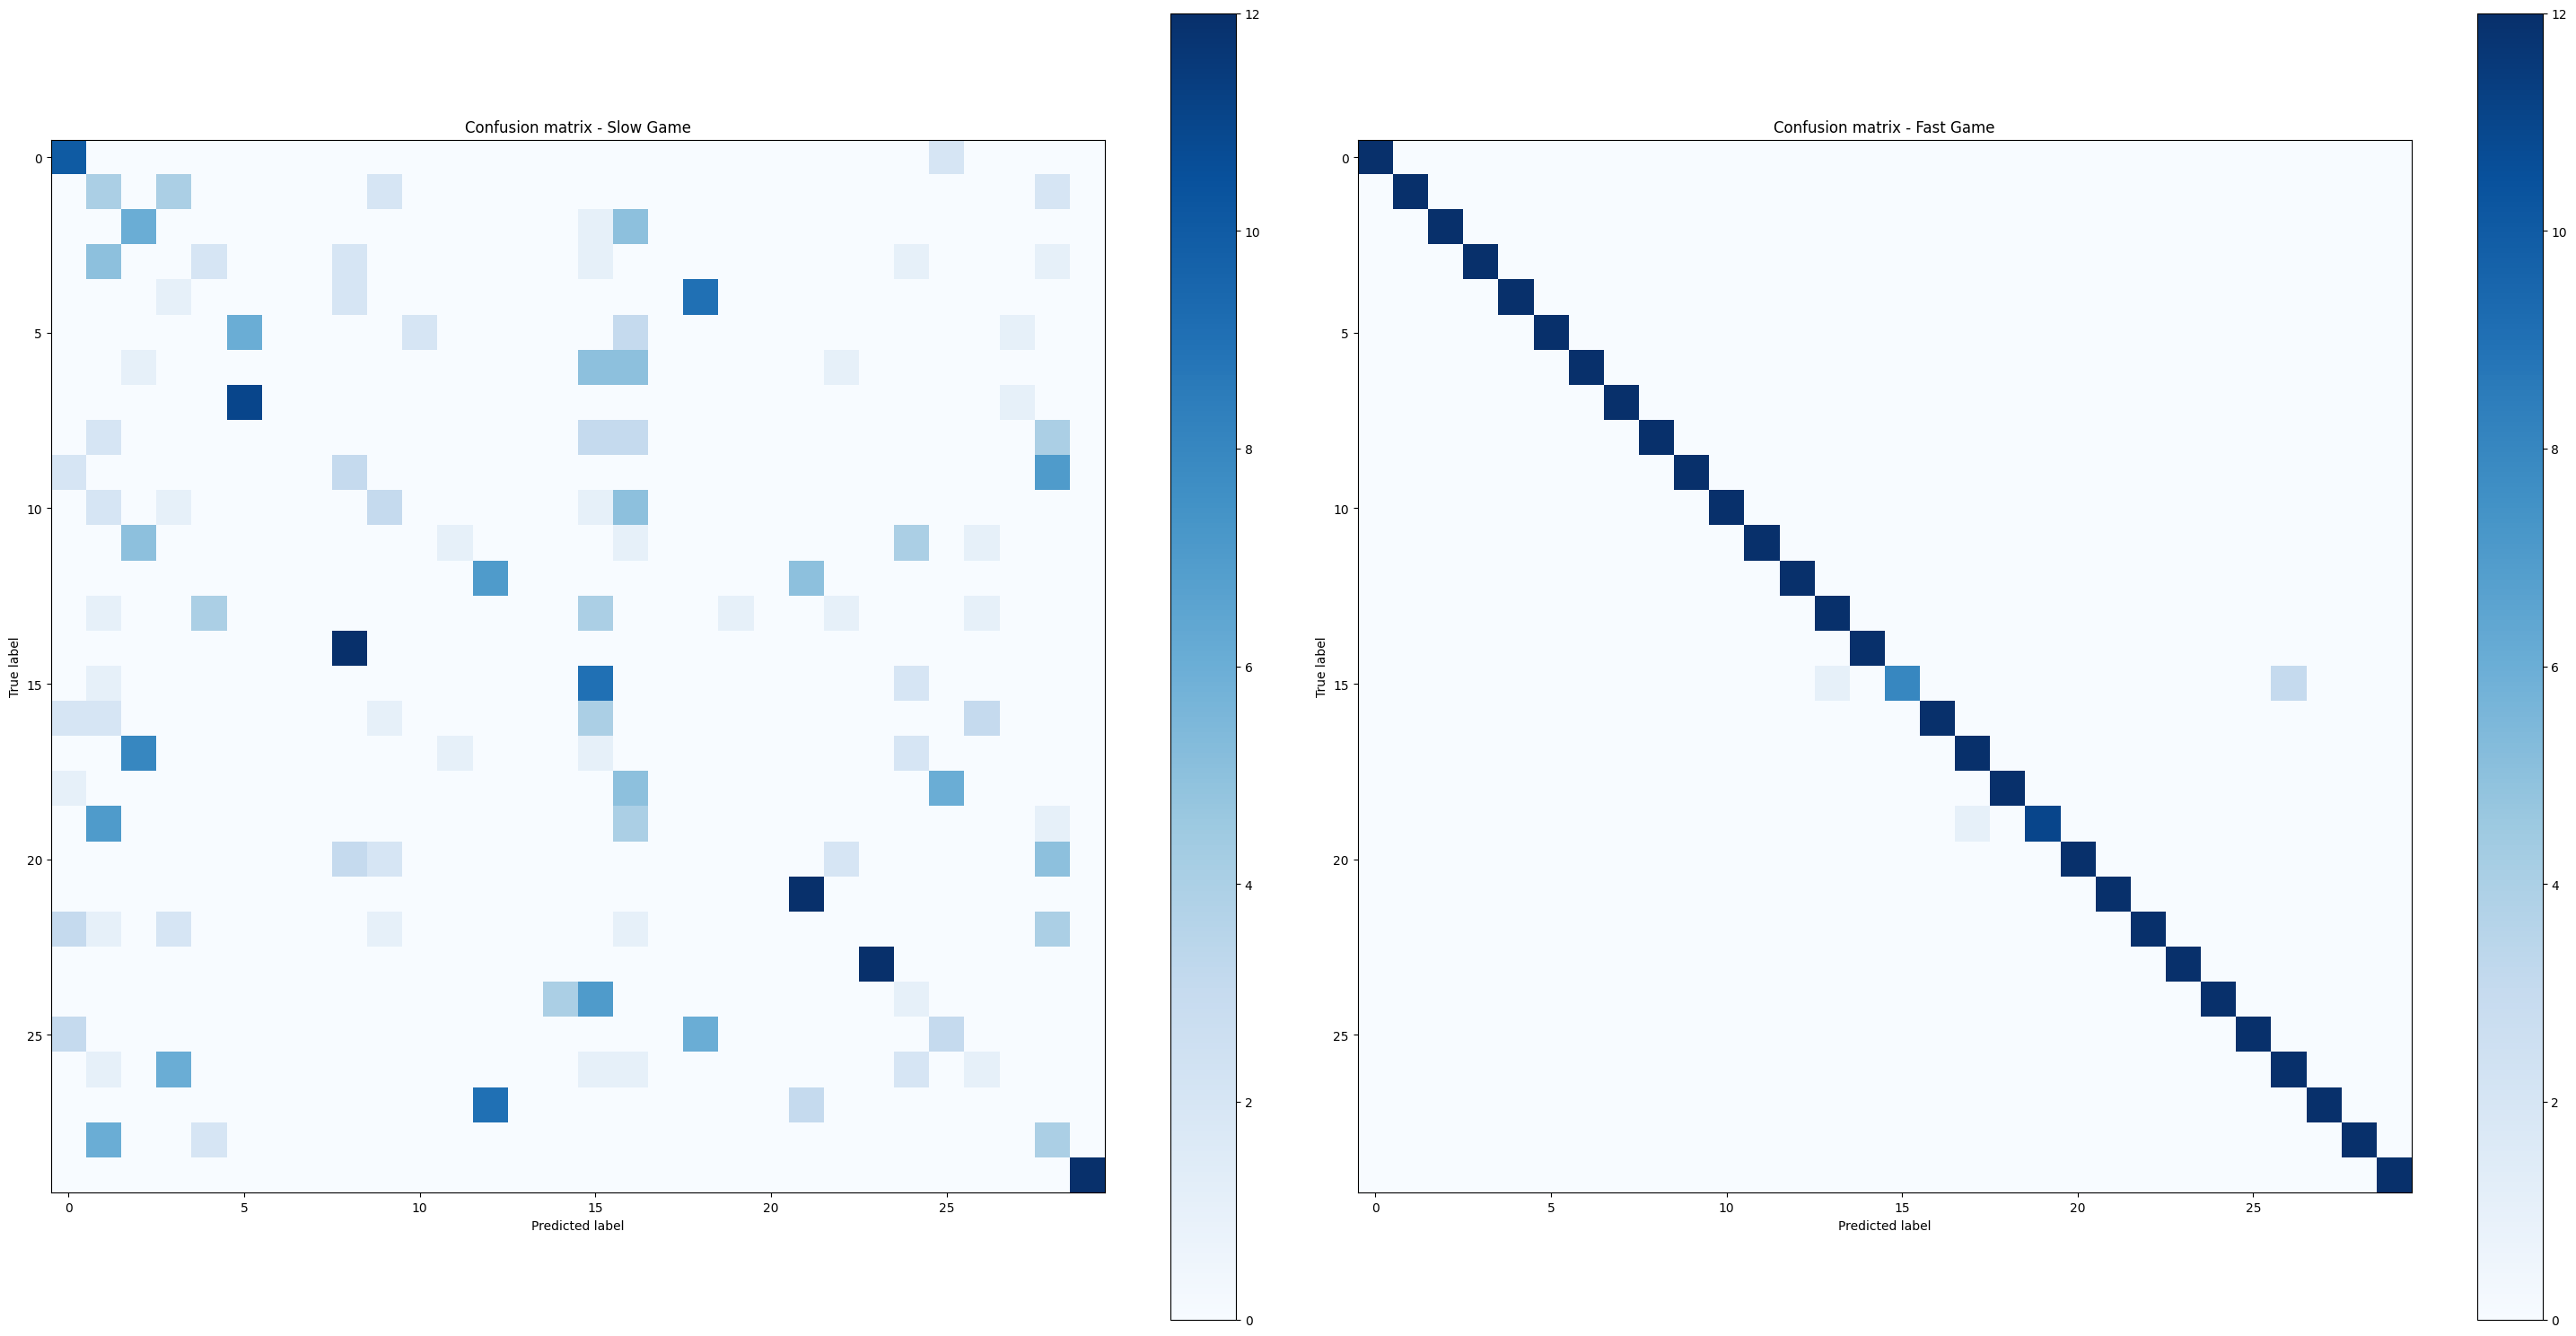

In [15]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

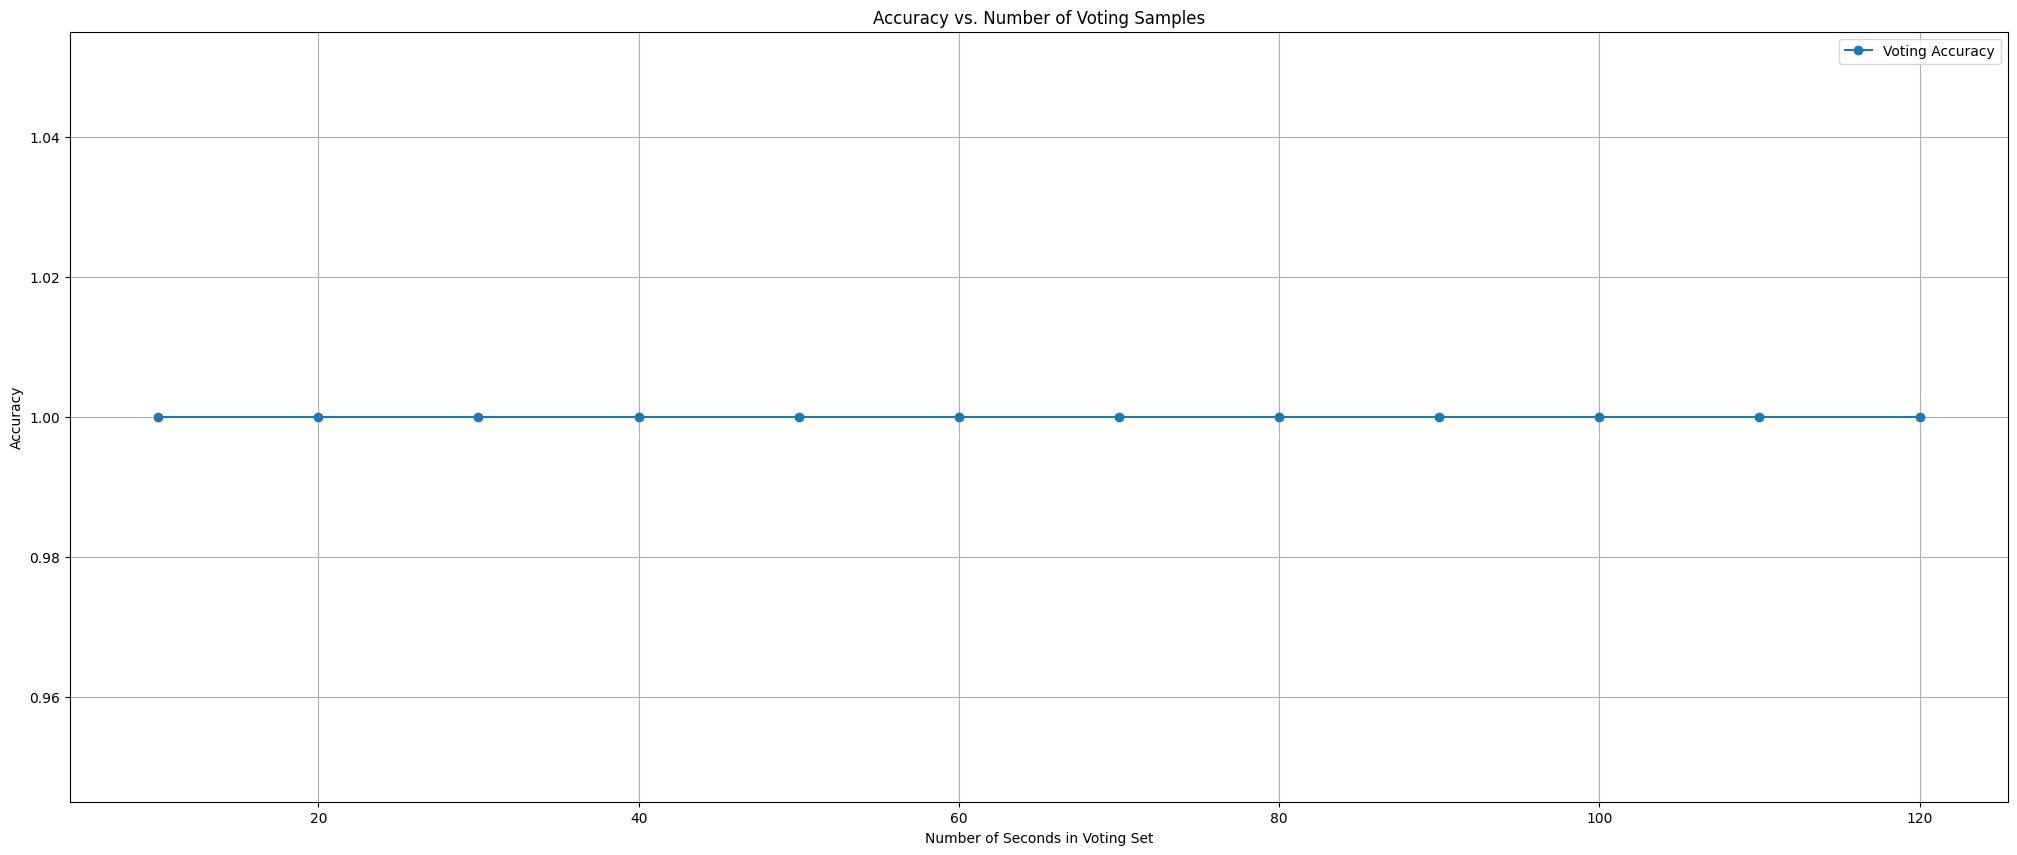


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,1.0
1,20,1.0
2,30,1.0
3,40,1.0
4,50,1.0
5,60,1.0
6,70,1.0
7,80,1.0
8,90,1.0
9,100,1.0


In [16]:
evaluator.plot_accuracy_by_vote(best_model_fast, fX_test, fy_test, increment=1)

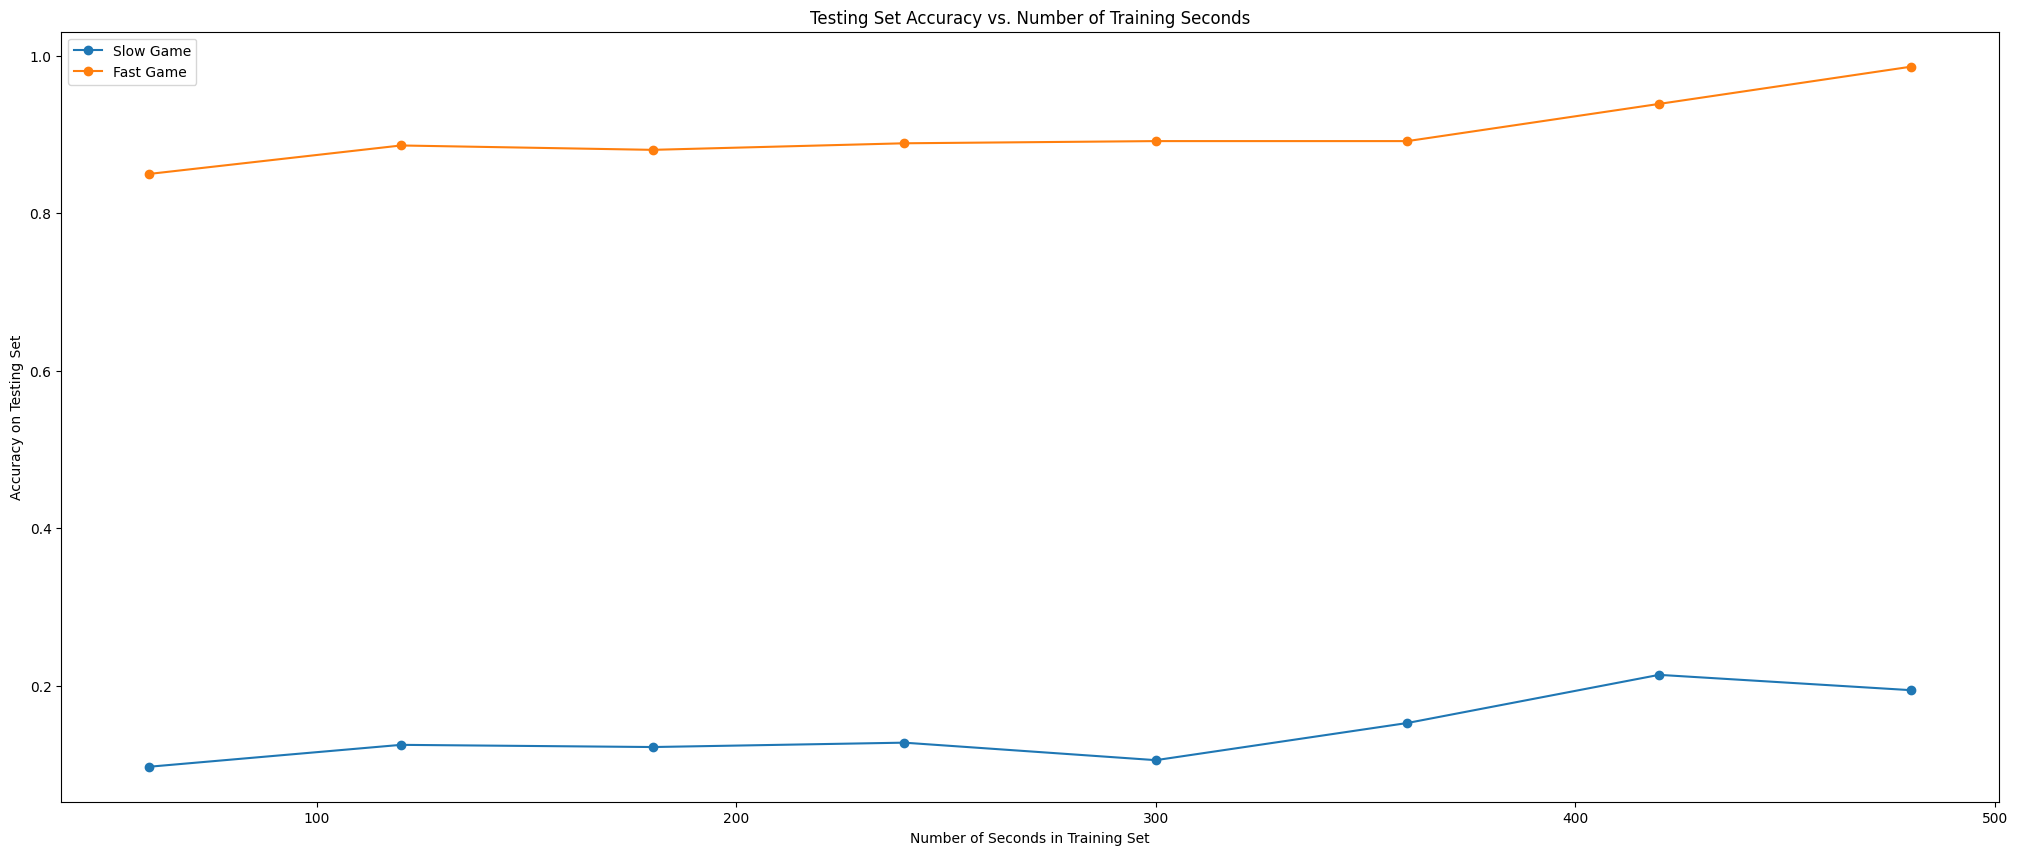


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.097222,0.850000
1,120,0.125000,0.886111
2,180,0.122222,0.880556
3,240,0.127778,0.888889
4,300,0.105556,0.891667
5,360,0.152778,0.891667
6,420,0.213889,0.938889
7,480,0.194444,0.986111


In [17]:
evaluator.accuracy_over_time(fX, fy, best_model_fast_name, range(1,9), X_test, y_test, fX_test, fy_test)

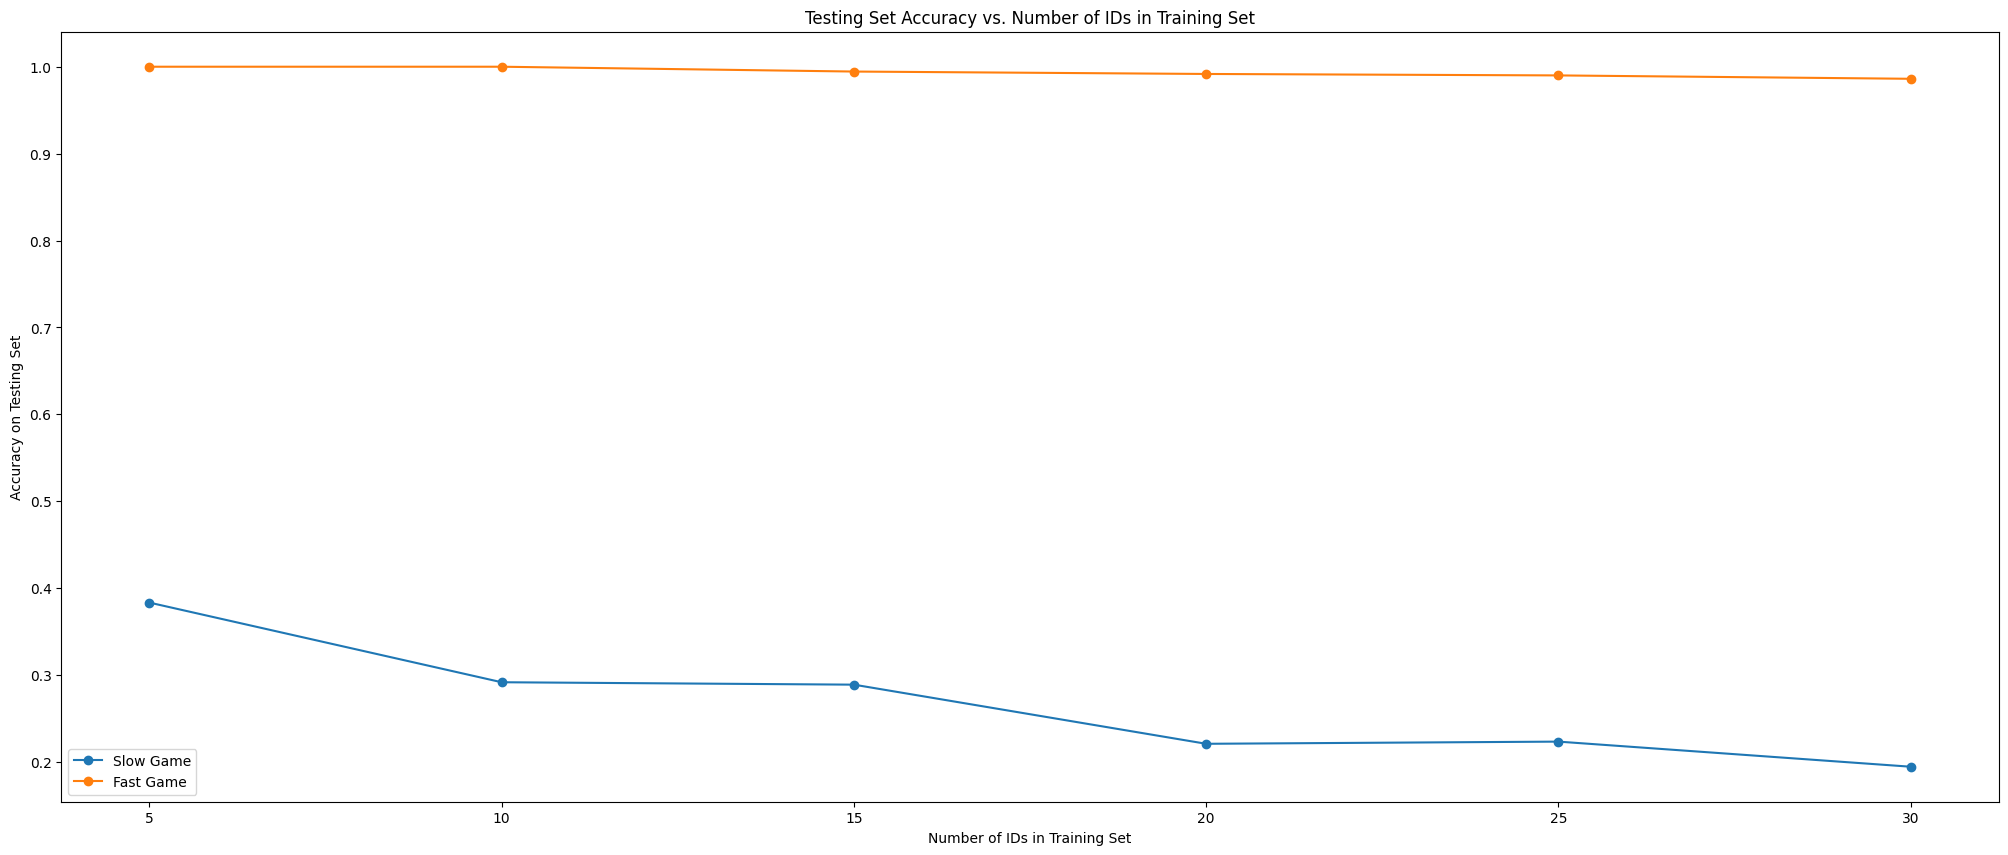


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,0.383333,1.000000
1,10,0.291667,1.000000
2,15,0.288889,0.994444
3,20,0.220833,0.991667
4,25,0.223333,0.990000
5,30,0.194444,0.986111


In [18]:
evaluator.accuracy_over_ids(fX_train, fy_train, best_model_fast_name, X_test, y_test,fX_test, fy_test)

### 3.1.3. Training On Forklift Simulator

In [19]:
X, y, fX, fy, X_train, y_train, X_test, y_test, fX_train, fy_train, fX_test, fy_test = evaluator.split_data(mov_combined, fast_combined

, id_range=range(30,60), train_minutes=8, test_minutes=2)

Size of the training set:  (1440, 490)
Size of the slow testing set:  (360, 490)
Size of the fast training set:  (1440, 490)
Size of the fast testing set:  (360, 490)


In [20]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast, best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(X_train,y_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Slow)').style.background_gradient(cmap= plt.cm.Blues)

100%|██████████| 15/15 [04:41<00:00, 18.77s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
11,BernoulliNB,0.062500,0.052778,0.033333,0.048727,0.017421,0.002319,0.381201,0.013508,0.001201,0.062500,0.052778,0.033333,3.339850,3.365777,3.417712
9,QuadraticDiscriminantAnalysis,1.000000,0.102778,0.038889,1.000000,0.105020,0.035836,1.000000,0.123777,0.044412,1.000000,0.102778,0.038889,0.000000,32.339167,34.641956
7,AdaBoostClassifier,0.266667,0.266667,0.033333,0.213033,0.213033,0.013441,0.207407,0.207407,0.009475,0.266667,0.266667,0.033333,2.555659,2.556441,6.012260
0,SVC,0.755556,0.800000,0.077778,0.743497,0.788462,0.059587,0.825871,0.852469,0.052013,0.755556,0.800000,0.077778,3.411707,3.411956,3.403677
8,GaussianNB,0.945833,0.861111,0.063889,0.945198,0.860644,0.036846,0.952148,0.888674,0.044196,0.945833,0.861111,0.063889,1.310609,4.744842,33.740864
3,DecisionTreeClassifier,1.000000,0.880556,0.044444,1.000000,0.876152,0.048299,1.000000,0.896400,0.082287,1.000000,0.880556,0.044444,0.000000,4.305214,34.441713
4,KNeighborsClassifier,0.957639,0.883333,0.077778,0.957509,0.882942,0.060300,0.959177,0.906925,0.068069,0.957639,0.883333,0.077778,0.157074,1.262282,30.683711
12,BaggingClassifier,1.000000,0.927778,0.088889,1.000000,0.926215,0.072432,1.000000,0.940934,0.075176,1.000000,0.927778,0.088889,0.039622,0.977986,26.751333
6,MLPClassifier,0.992361,0.933333,0.088889,0.992345,0.933476,0.071715,0.992459,0.944761,0.106602,0.992361,0.933333,0.088889,0.145902,0.257758,11.772056
13,LGBMClassifier,1.000000,0.952778,0.075000,1.000000,0.952600,0.075574,1.000000,0.956746,0.124767,1.000000,0.952778,0.075000,0.000018,0.146237,10.579373


In [21]:
explainer = shap.TreeExplainer(best_model_slow)
shap_values_slow = explainer.shap_values(X_test)

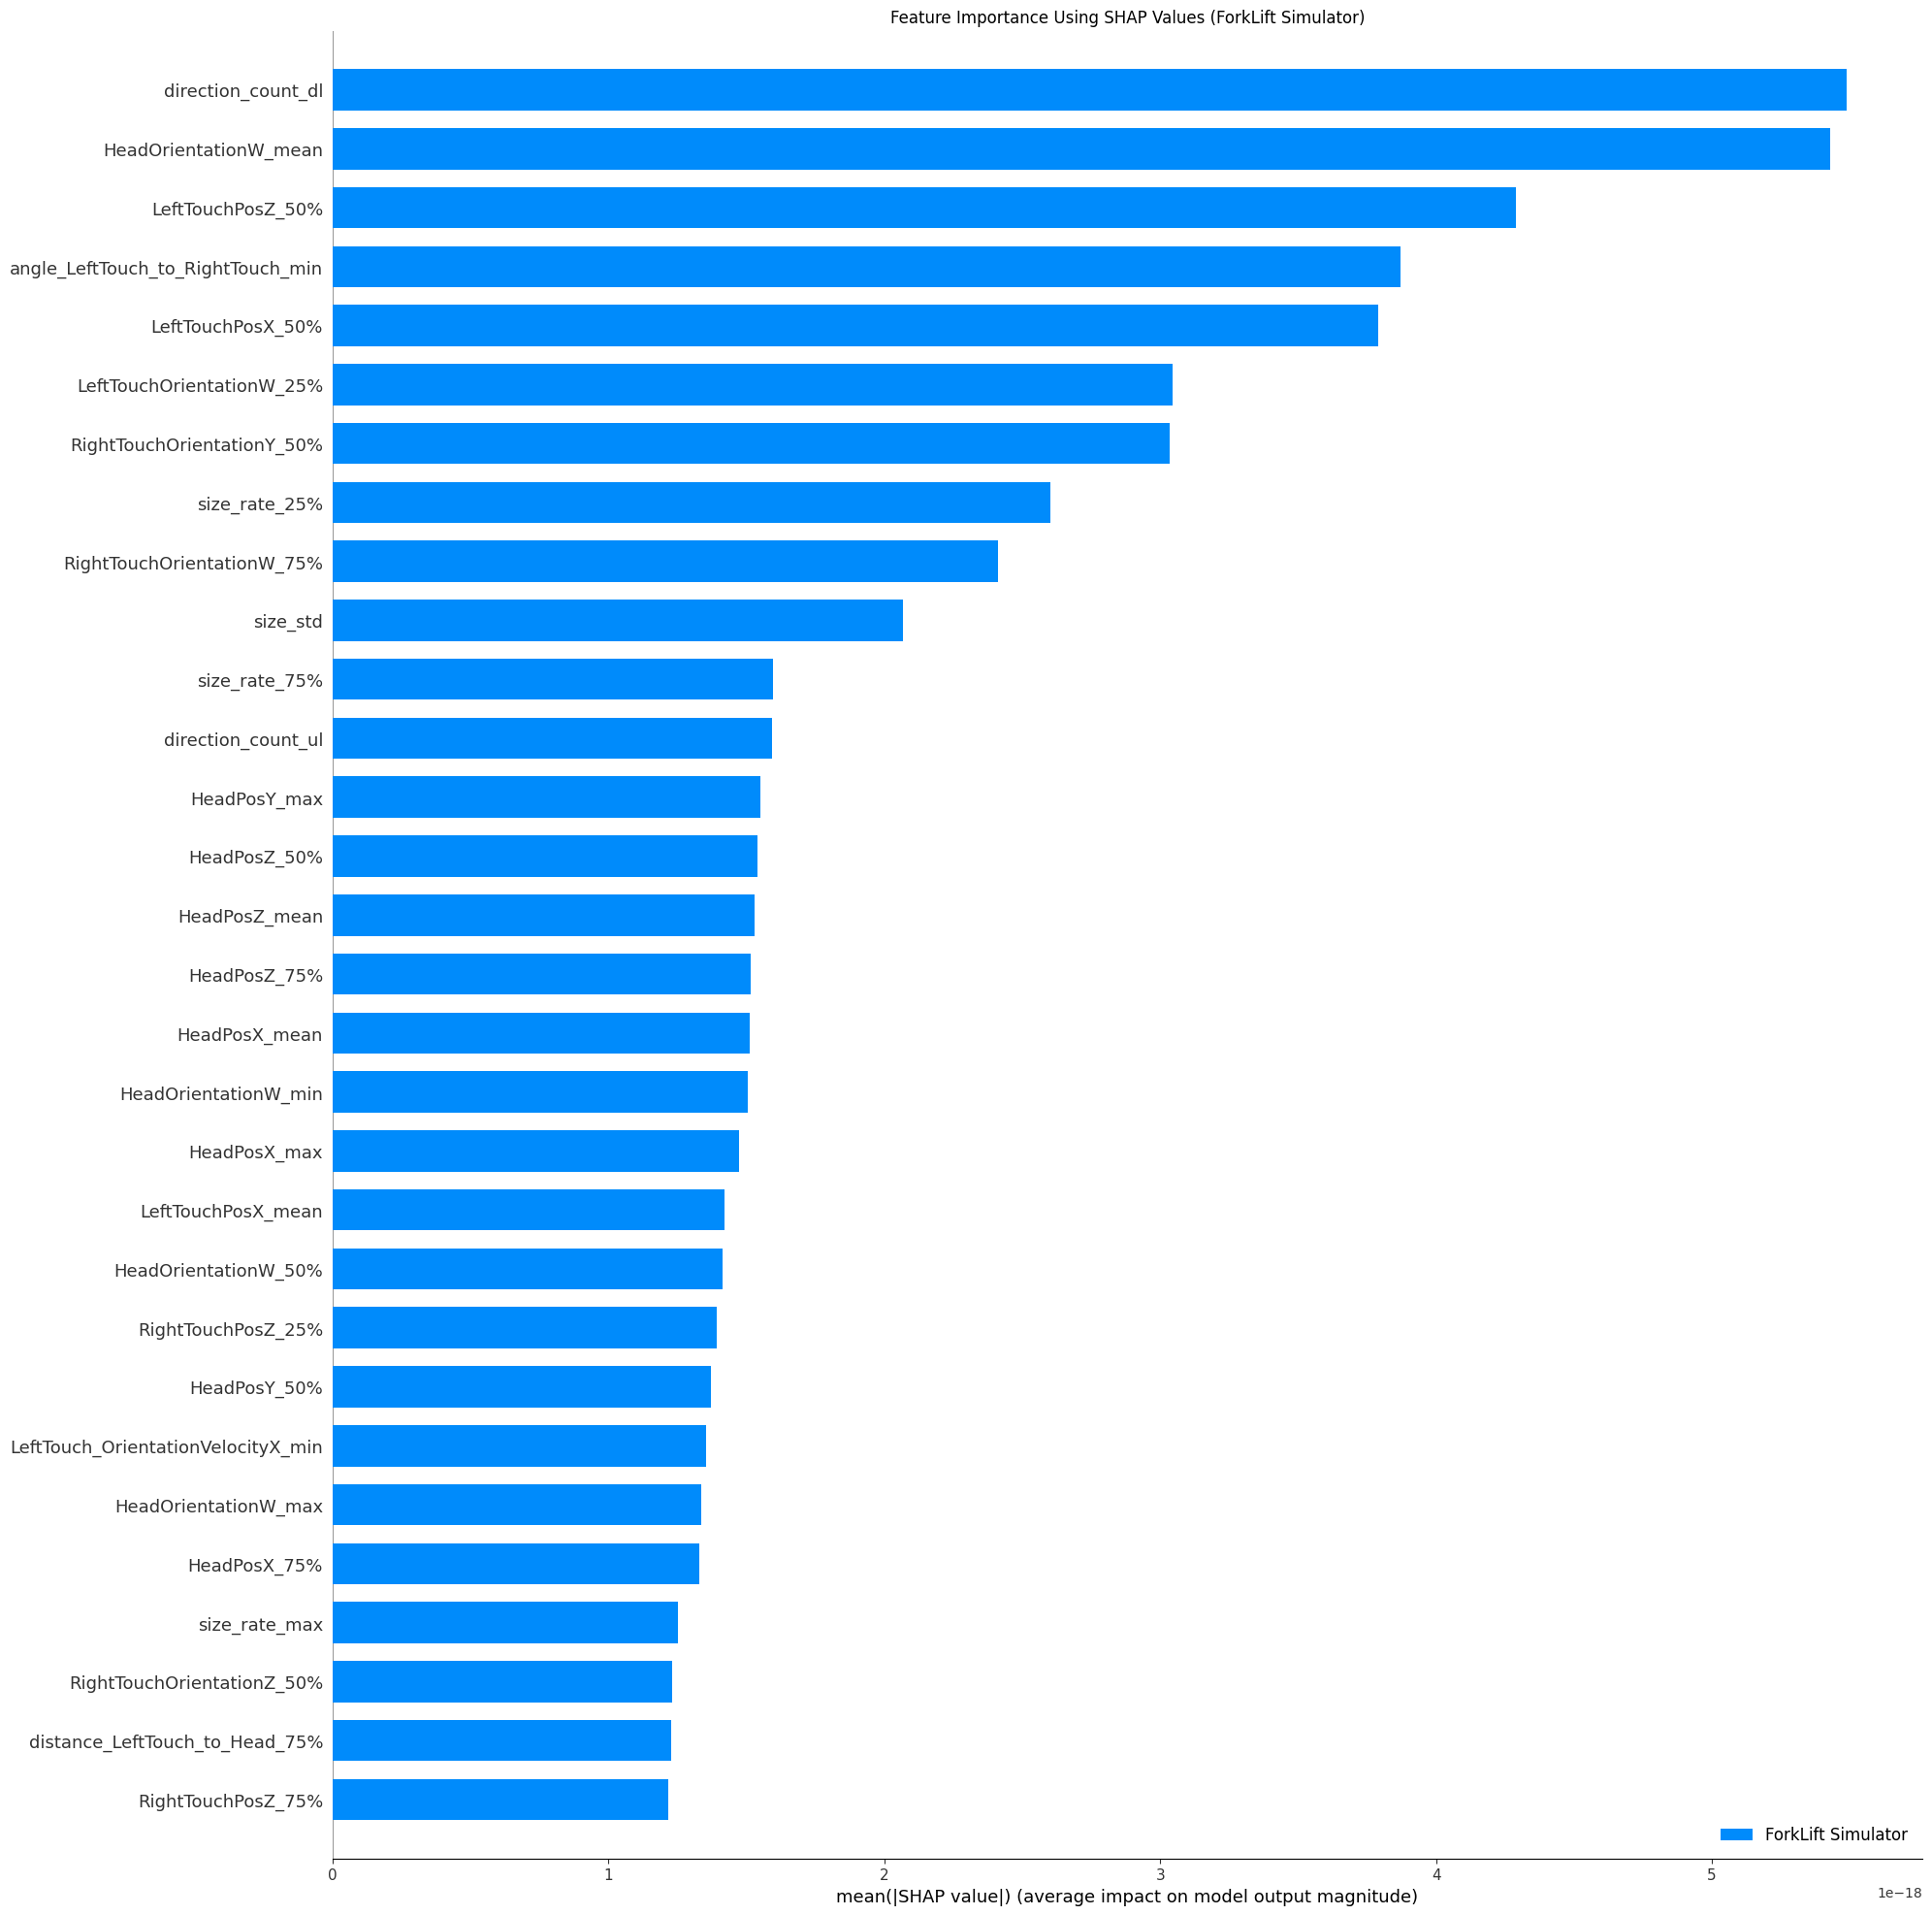

In [22]:
VisualizationUtils.shap_plotter([np.mean(shap_values_slow, axis=2)], 
                          X_test, title="Feature Importance Using SHAP Values (ForkLift Simulator)",
                          class_names=['ForkLift Simulator'])

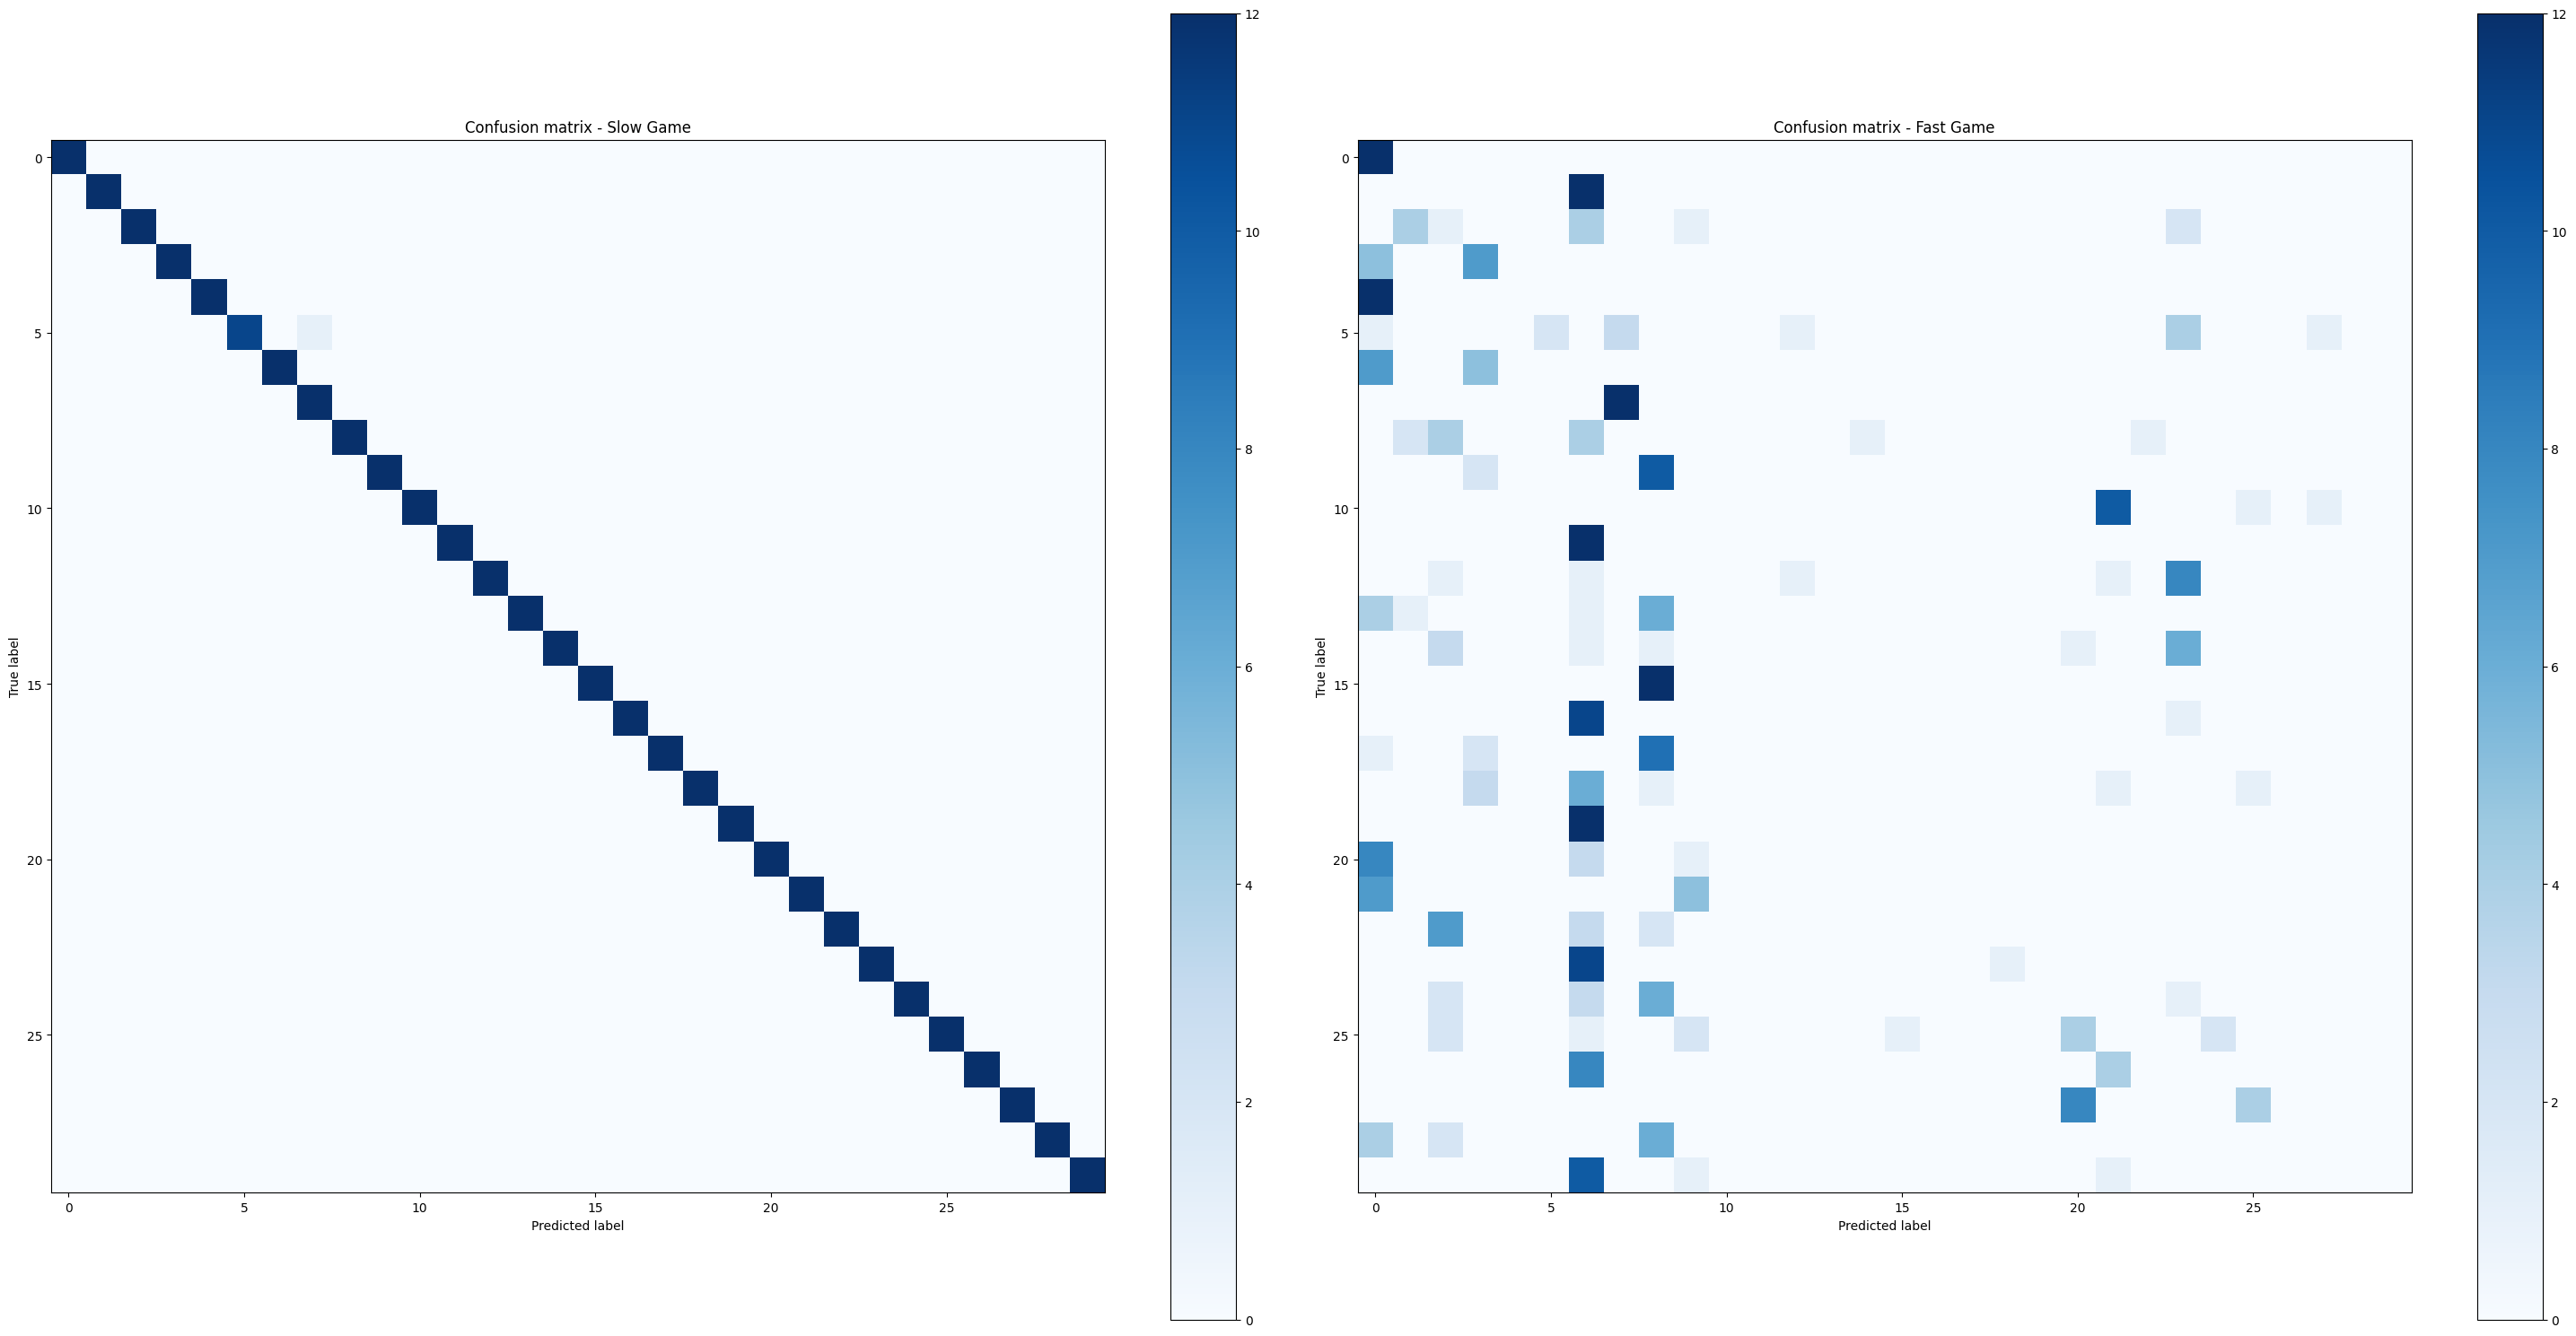

In [23]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

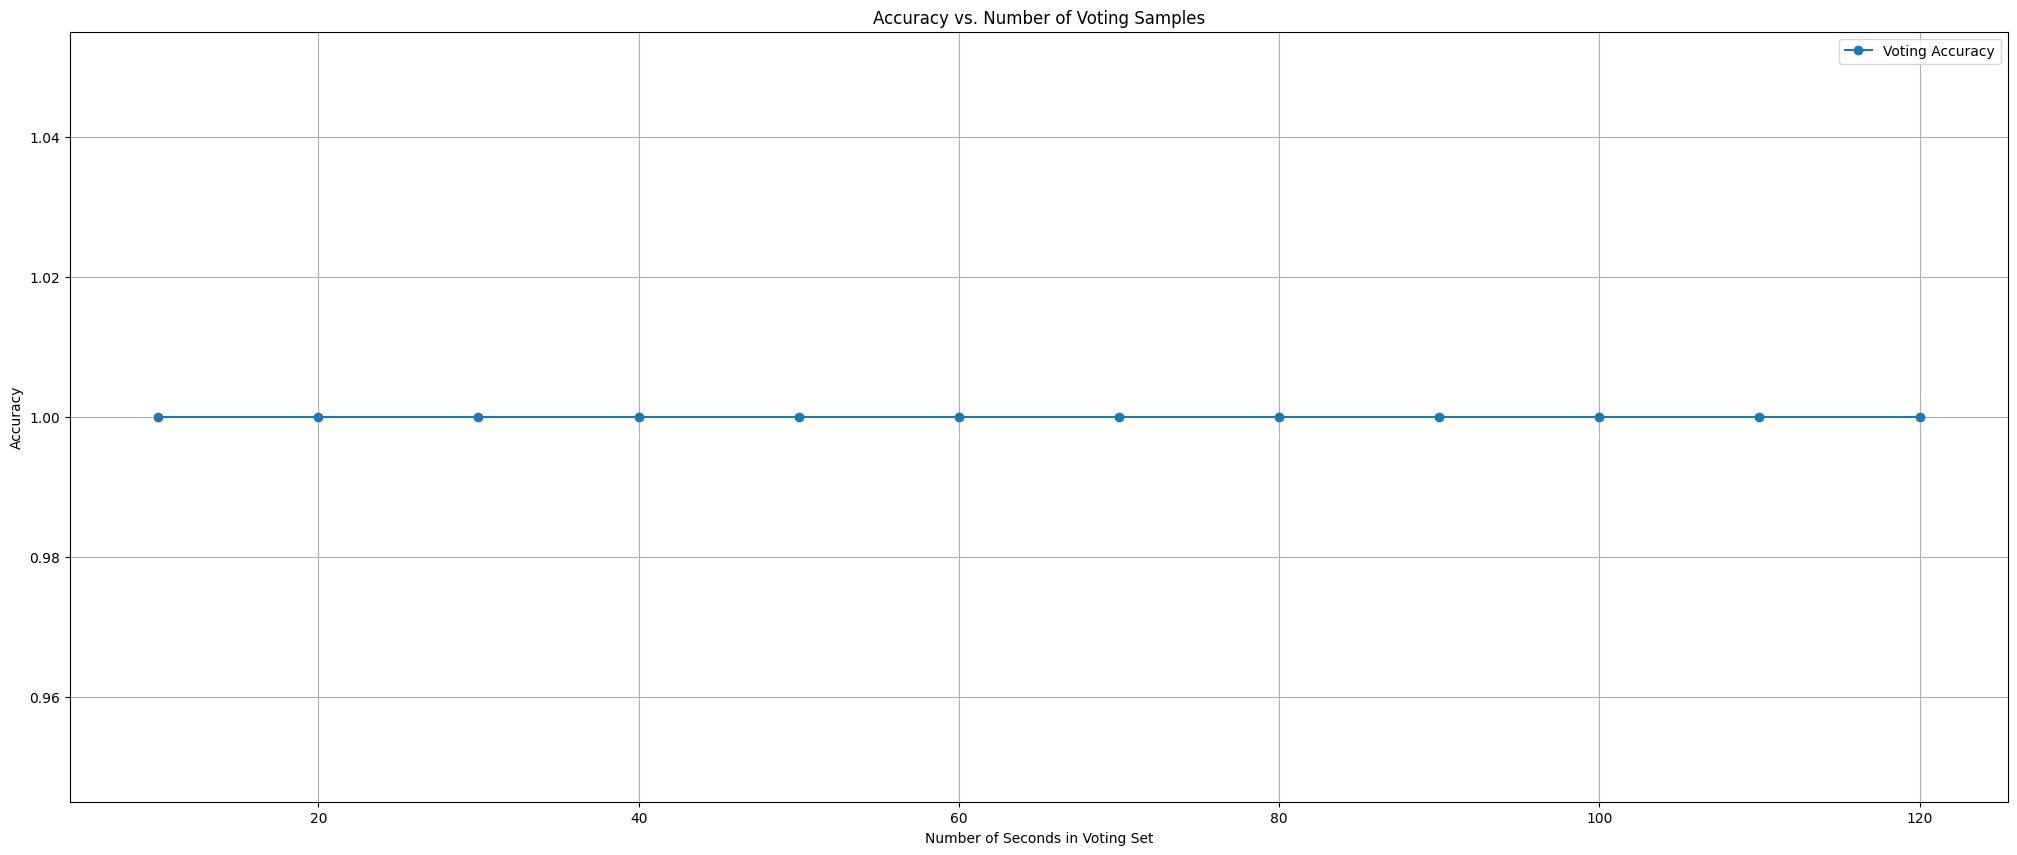


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,1.0
1,20,1.0
2,30,1.0
3,40,1.0
4,50,1.0
5,60,1.0
6,70,1.0
7,80,1.0
8,90,1.0
9,100,1.0


In [24]:
evaluator.plot_accuracy_by_vote(best_model_slow, X_test, y_test, increment=1)

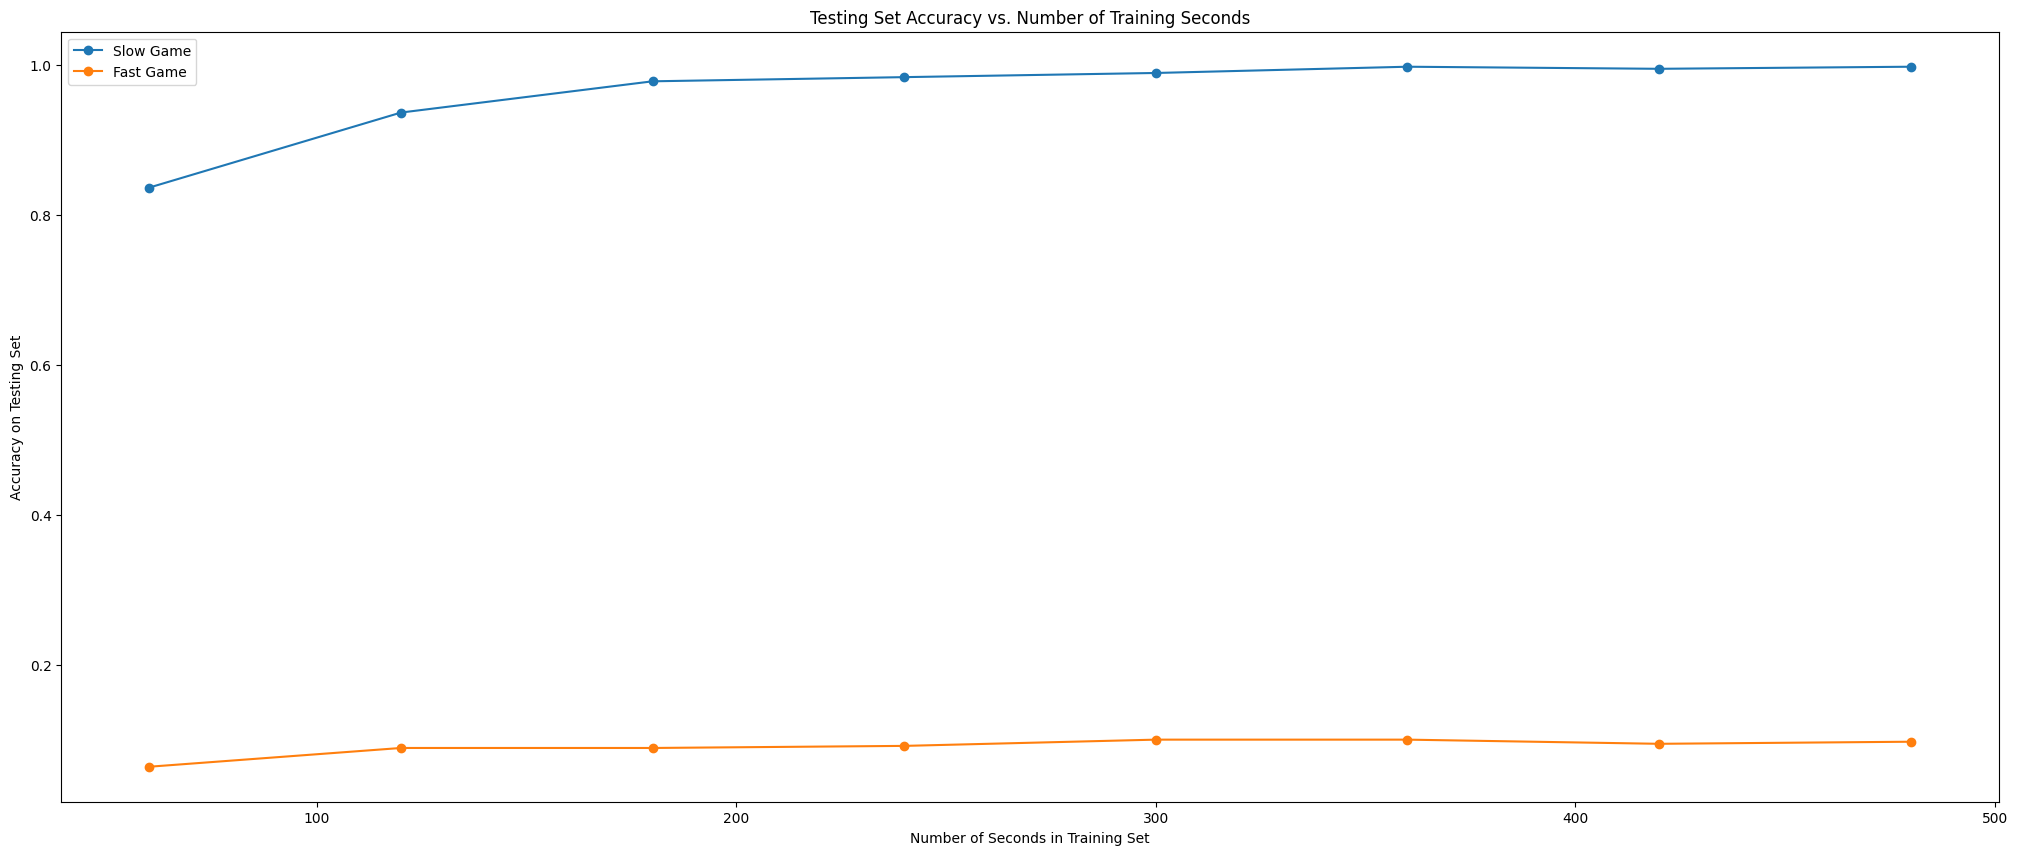


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.836111,0.063889
1,120,0.936111,0.088889
2,180,0.977778,0.088889
3,240,0.983333,0.091667
4,300,0.988889,0.100000
5,360,0.997222,0.100000
6,420,0.994444,0.094444
7,480,0.997222,0.097222


In [25]:
evaluator.accuracy_over_time(X, y,best_model_slow_name, range(1,9), X_test, y_test, fX_test, fy_test)

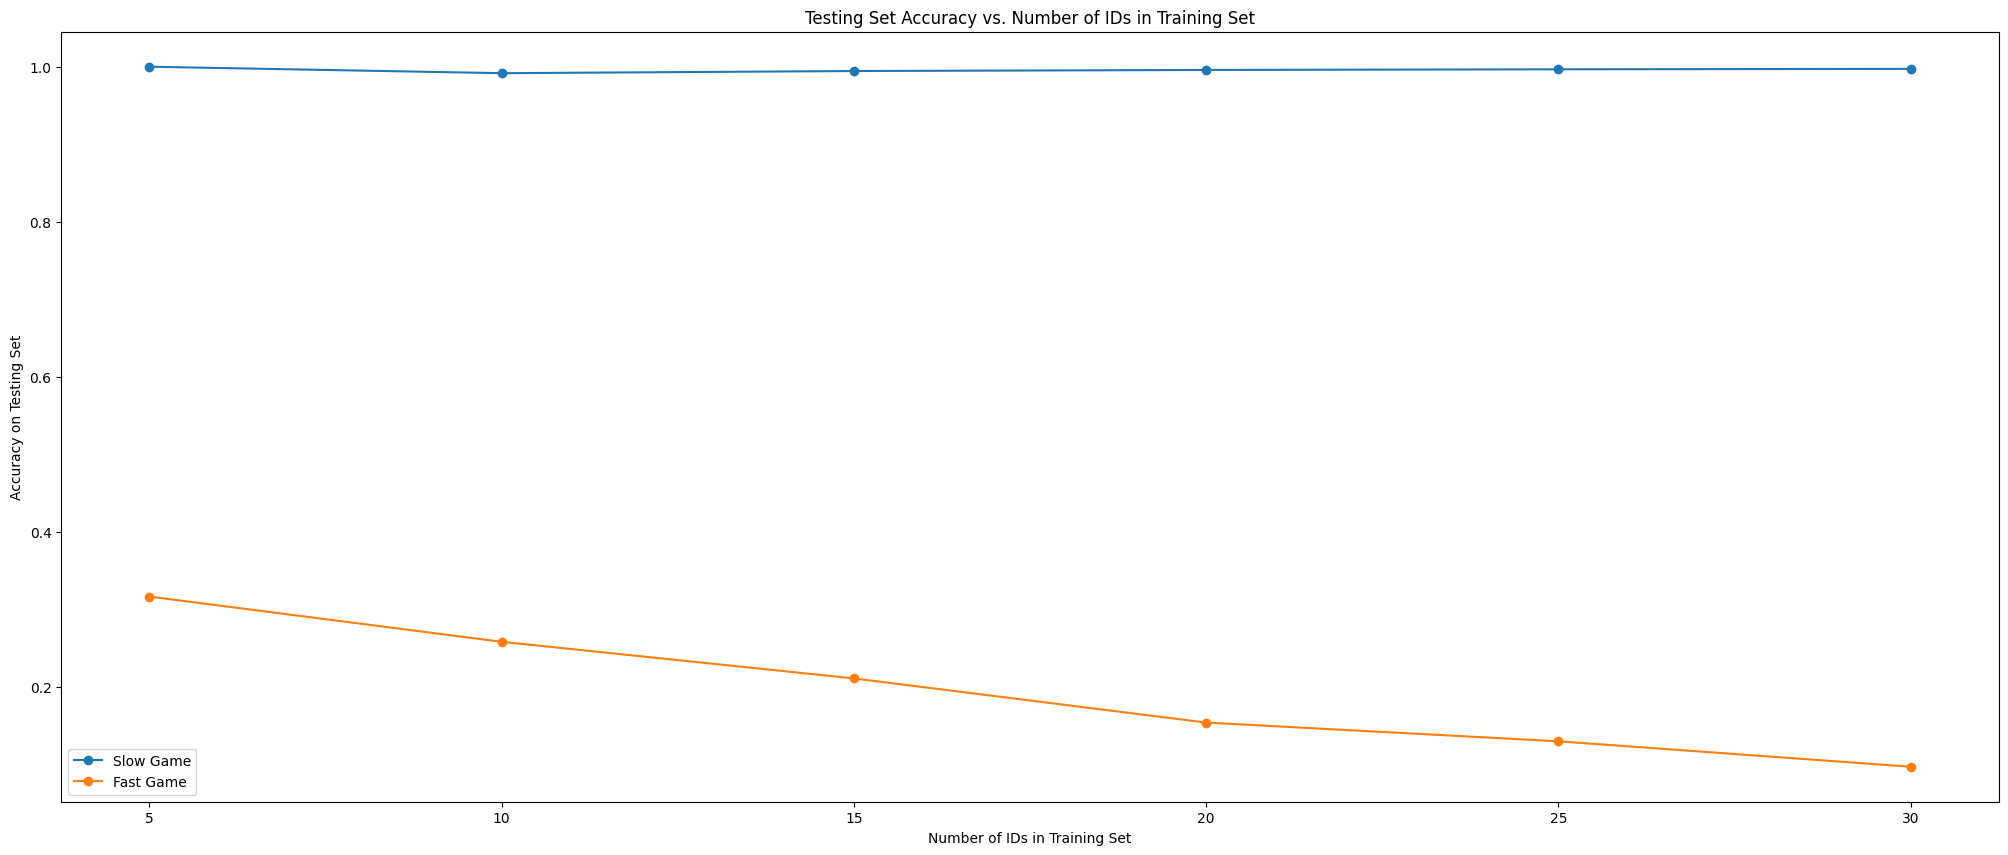


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,1.000000,0.316667
1,10,0.991667,0.258333
2,15,0.994444,0.211111
3,20,0.995833,0.154167
4,25,0.996667,0.130000
5,30,0.997222,0.097222


In [26]:
evaluator.accuracy_over_ids(X_train, y_train,best_model_slow_name, X_test, y_test,fX_test, fy_test)

### 3.1.4. Training On Medal of Honor

In [27]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast, best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(fX_train,fy_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Fast)').style.background_gradient(cmap= plt.cm.Blues)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [05:17<00:00, 21.15s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
11,BernoulliNB,0.116667,0.027778,0.044444,0.117698,0.001927,0.019006,0.620510,0.000998,0.034545,0.116667,0.027778,0.044444,3.303513,4.135566,4.088124
9,QuadraticDiscriminantAnalysis,1.000000,0.036111,0.083333,1.000000,0.029768,0.078886,1.000000,0.033423,0.081663,1.000000,0.036111,0.083333,0.000000,34.742077,33.040016
7,AdaBoostClassifier,0.100000,0.066667,0.097222,0.057595,0.024521,0.056480,0.050555,0.017857,0.051231,0.100000,0.066667,0.097222,3.055726,4.156951,3.148366
0,SVC,0.691667,0.155556,0.444444,0.681280,0.079581,0.416129,0.747397,0.060895,0.454910,0.691667,0.155556,0.444444,3.414685,3.404313,3.411881
4,KNeighborsClassifier,0.893750,0.155556,0.561111,0.892298,0.078734,0.555482,0.899849,0.061939,0.607182,0.893750,0.155556,0.561111,0.303820,27.493684,8.180720
8,GaussianNB,0.866667,0.069444,0.638889,0.861305,0.026191,0.615470,0.887099,0.018819,0.732367,0.866667,0.069444,0.638889,4.026543,33.115830,11.883395
3,DecisionTreeClassifier,1.000000,0.033333,0.722222,1.000000,0.022222,0.702632,1.000000,0.016667,0.724630,1.000000,0.033333,0.722222,0.000000,34.842198,10.012126
6,MLPClassifier,0.990972,0.127778,0.725000,0.990876,0.054929,0.714378,0.991142,0.038470,0.761188,0.990972,0.127778,0.725000,0.088423,8.278729,0.974600
10,LogisticRegression,0.986111,0.136111,0.738889,0.986040,0.067123,0.731167,0.986330,0.052067,0.765870,0.986111,0.136111,0.738889,0.248655,5.354784,0.937329
12,BaggingClassifier,0.998611,0.033333,0.822222,0.998611,0.022222,0.804773,0.998639,0.016667,0.833088,0.998611,0.033333,0.822222,0.076246,30.384339,1.308328


In [28]:
explainer = shap.TreeExplainer(best_model_fast)
shap_values_fast = explainer.shap_values(fX_test)

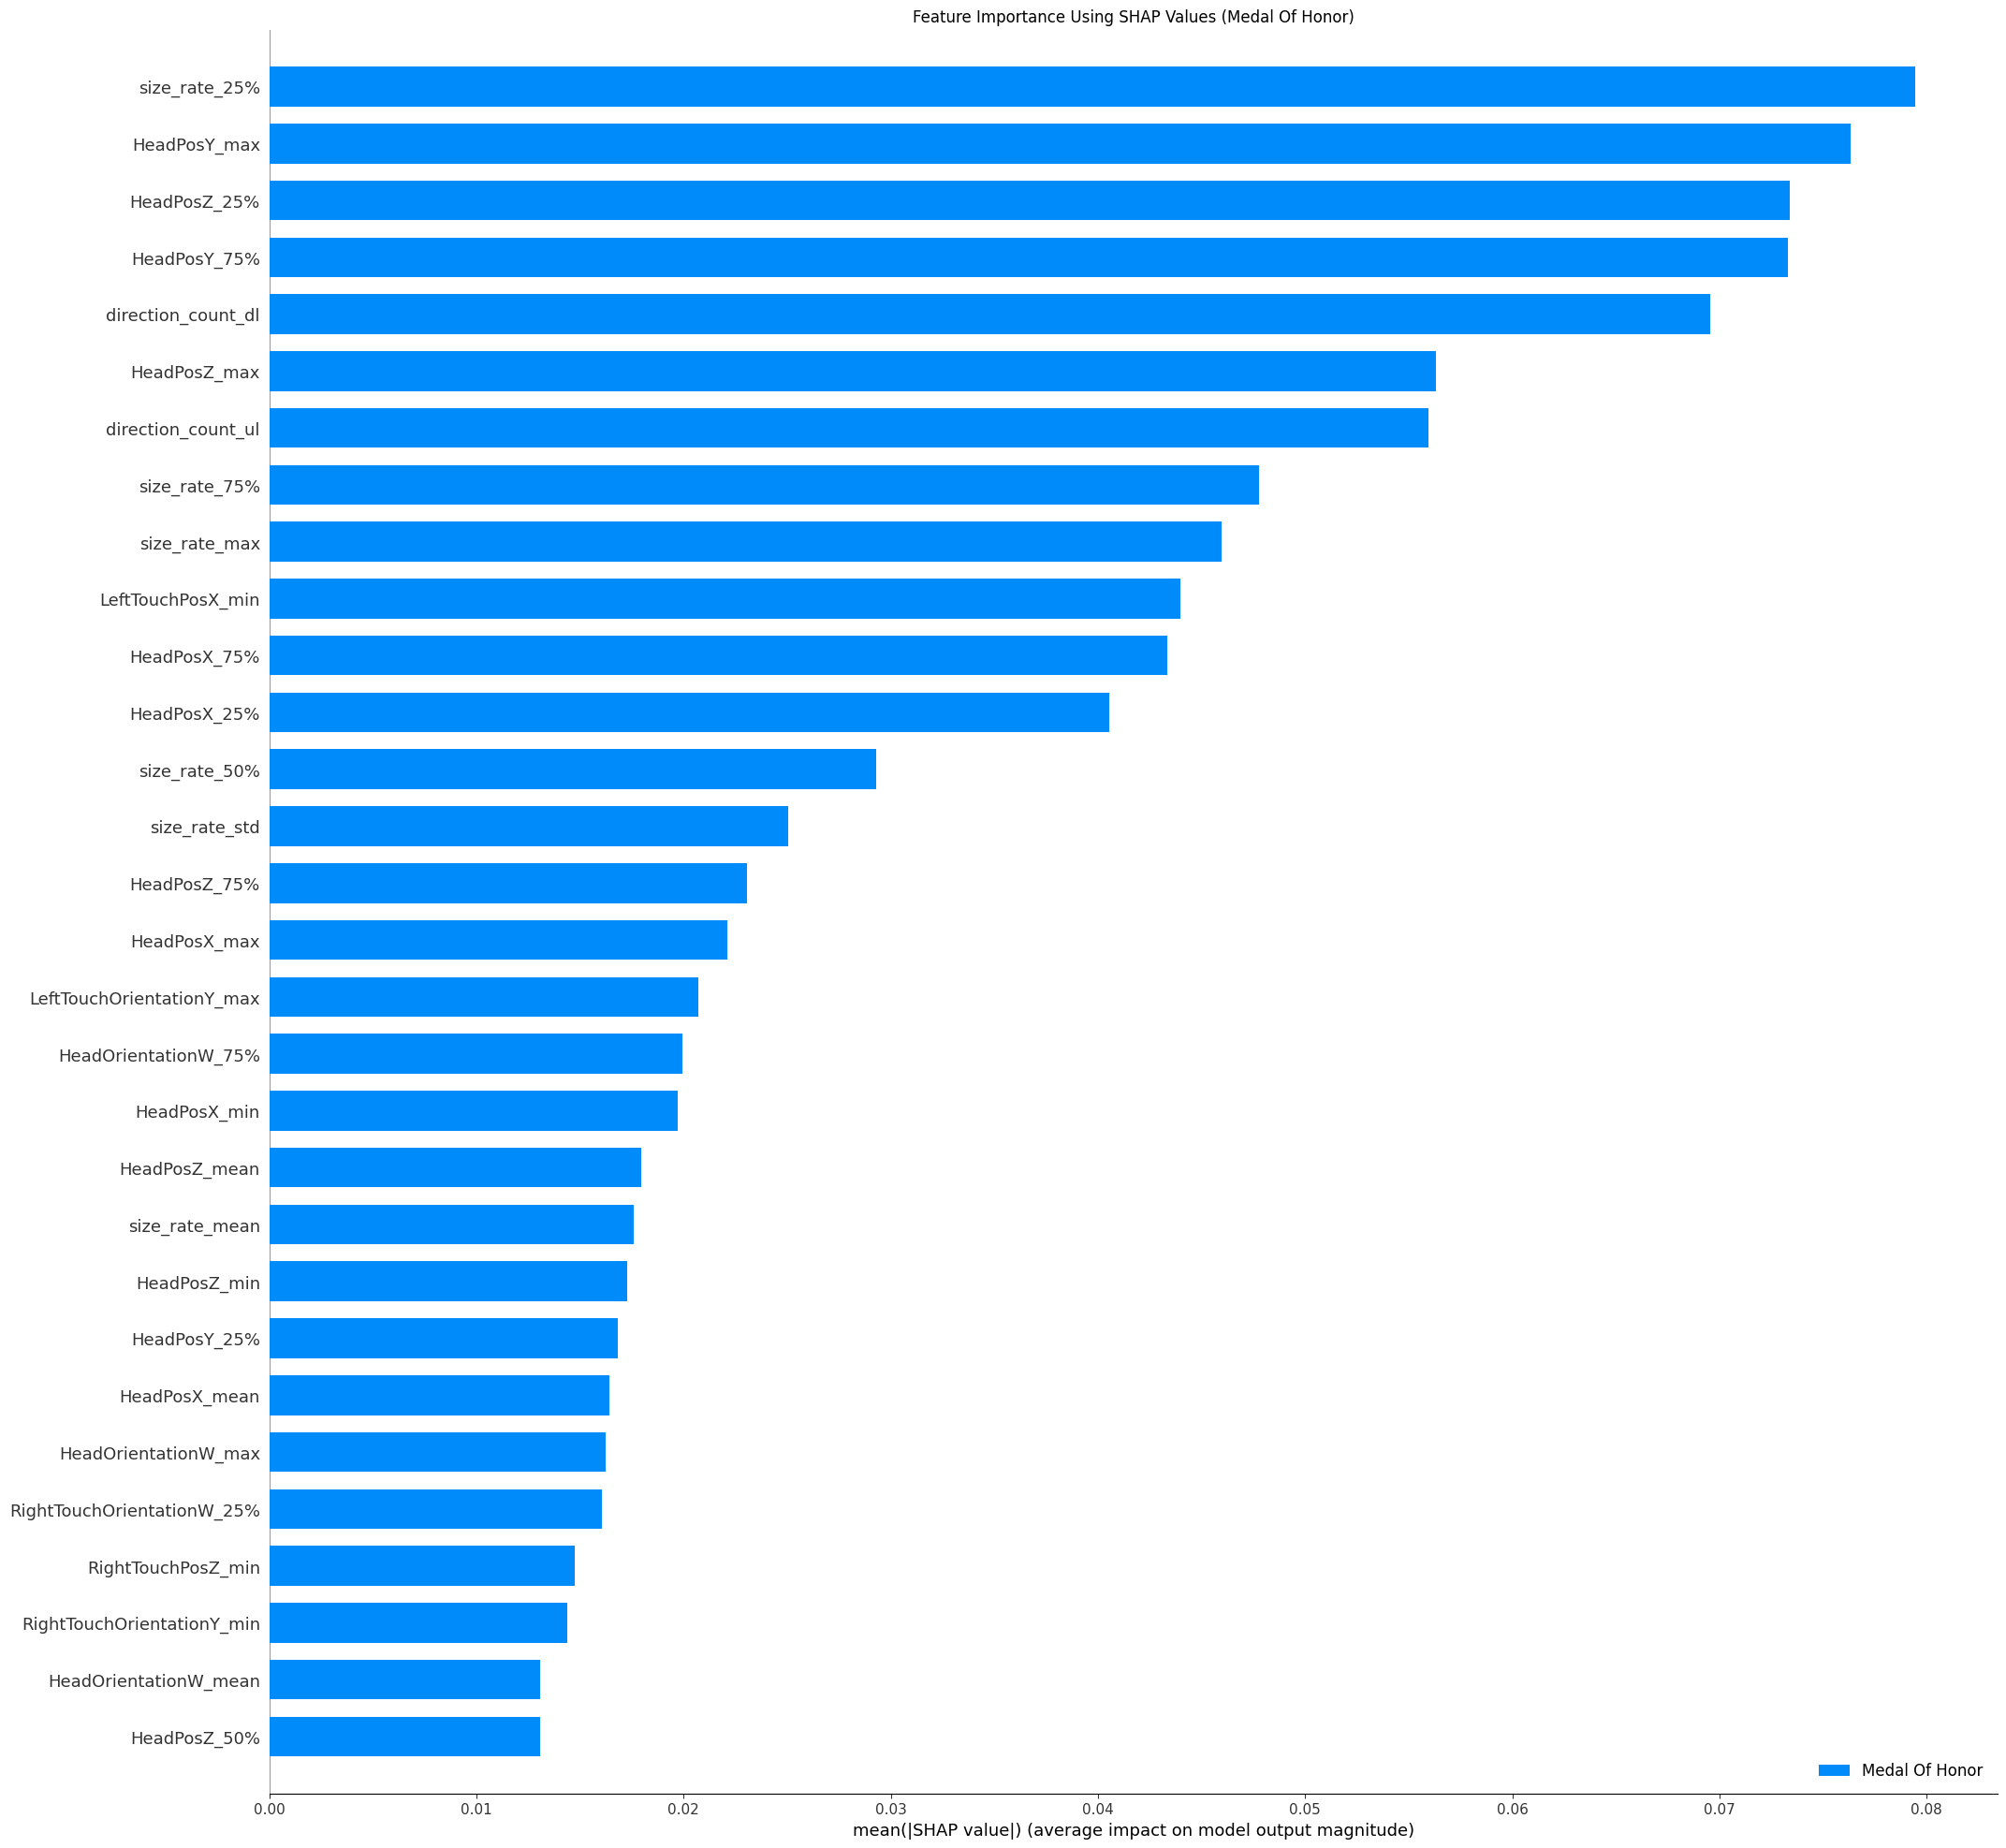

In [29]:
VisualizationUtils.shap_plotter([np.mean(shap_values_fast, axis=2)], 
                          fX_test, title="Feature Importance Using SHAP Values (Medal Of Honor)",
                          class_names=['Medal Of Honor'])

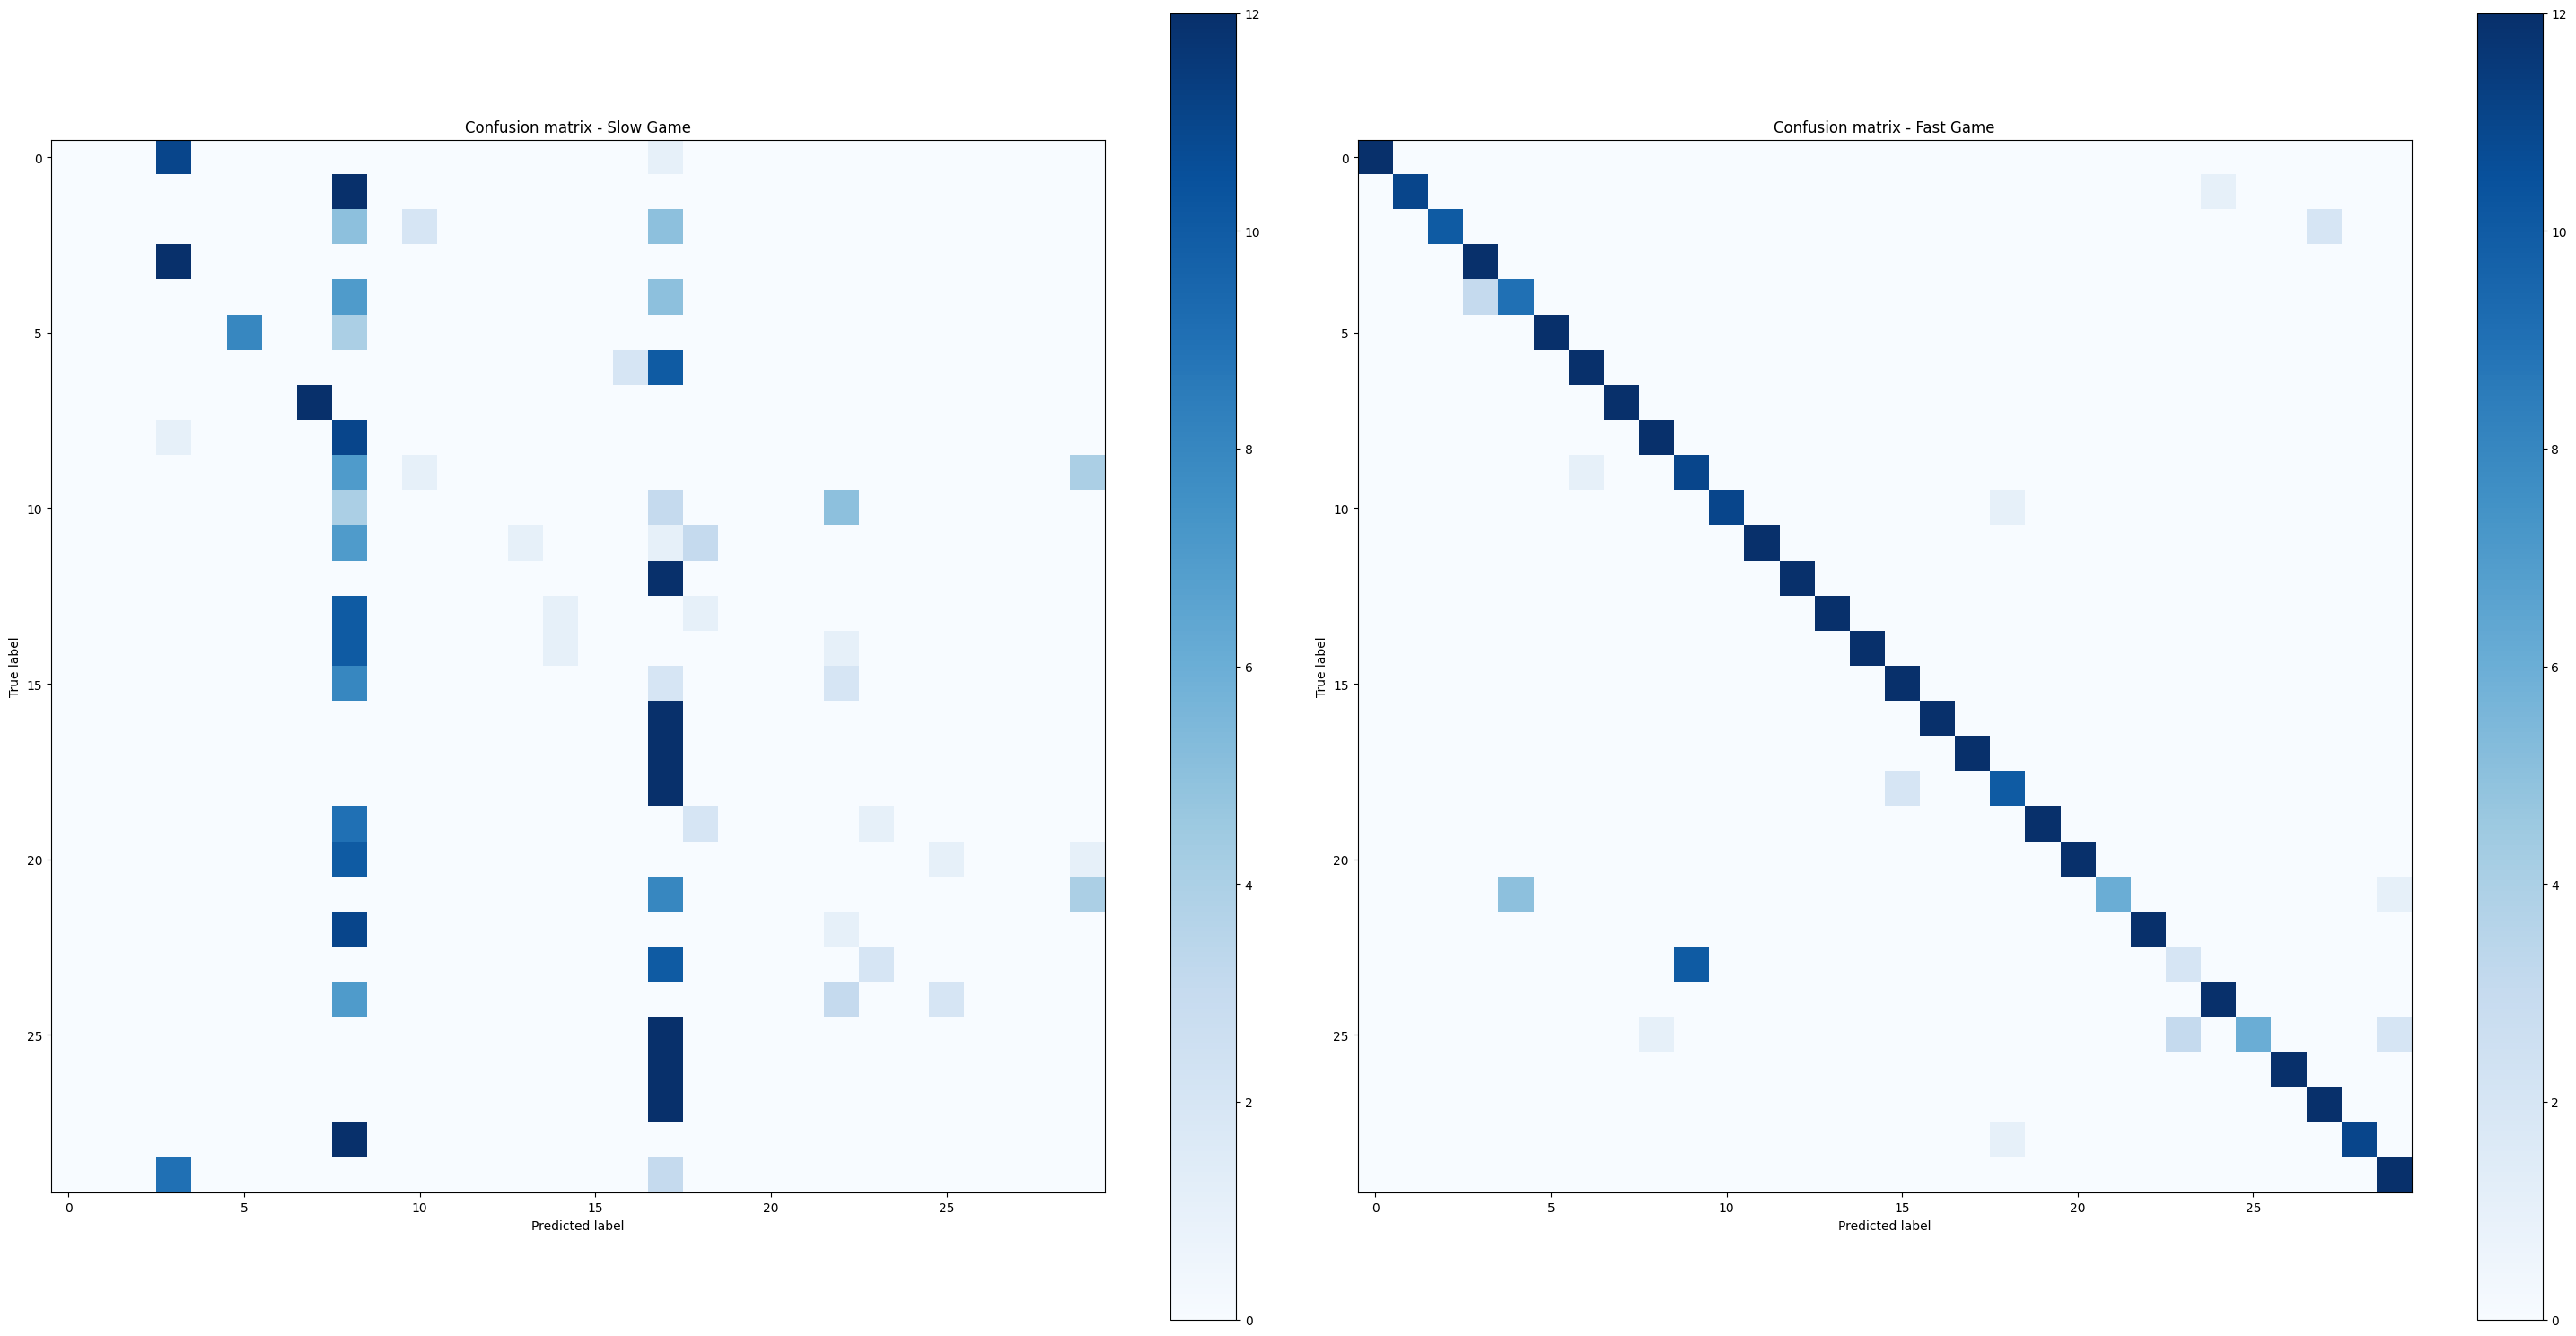

In [30]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

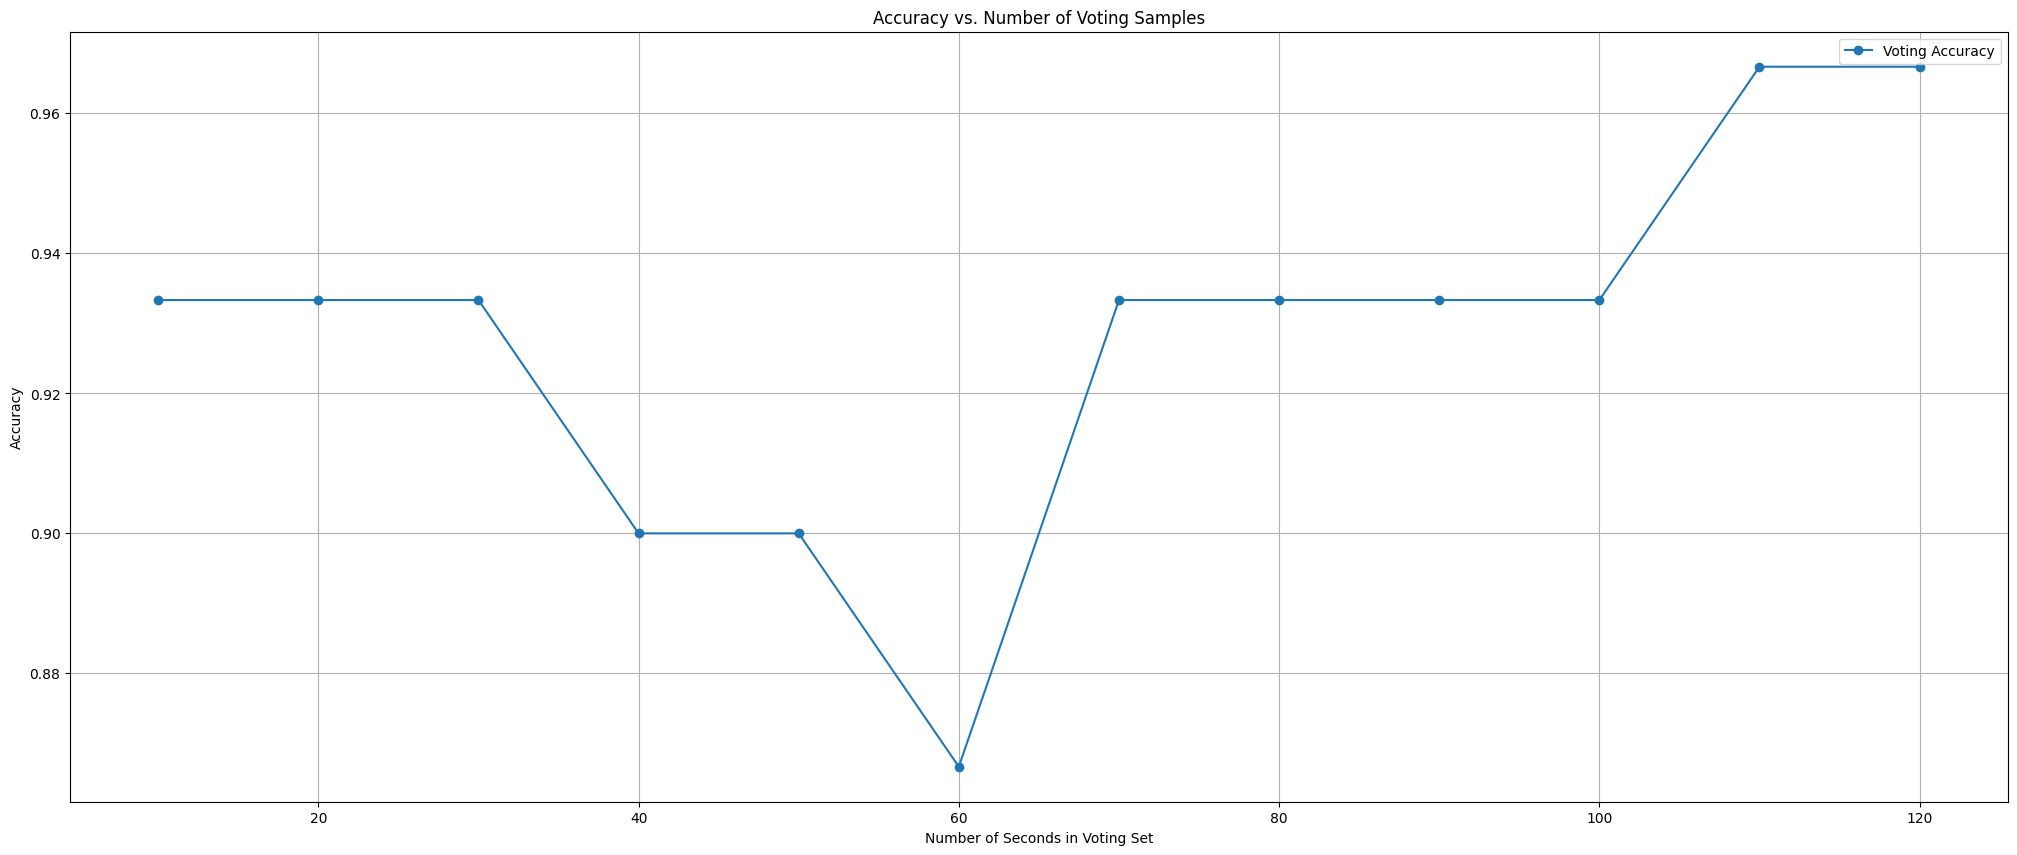


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,0.933333
1,20,0.933333
2,30,0.933333
3,40,0.900000
4,50,0.900000
5,60,0.866667
6,70,0.933333
7,80,0.933333
8,90,0.933333
9,100,0.933333


In [31]:
evaluator.plot_accuracy_by_vote(best_model_fast, fX_test, fy_test, increment=1)

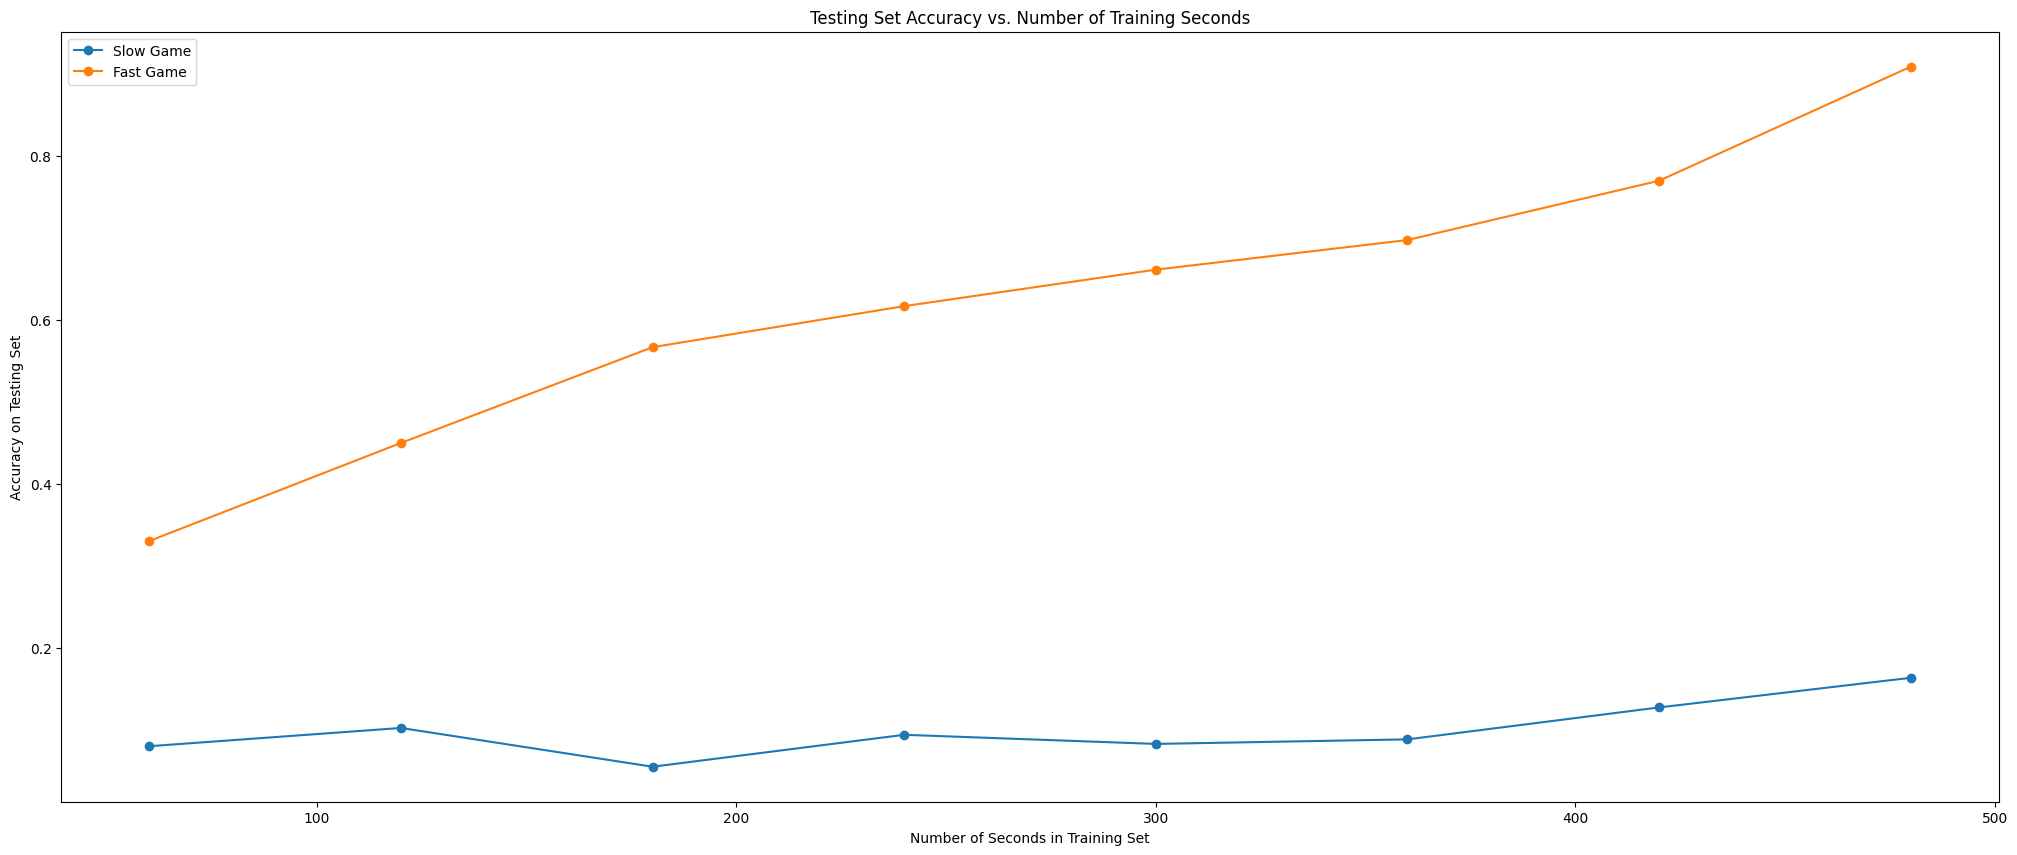


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.080556,0.330556
1,120,0.102778,0.450000
2,180,0.055556,0.566667
3,240,0.094444,0.616667
4,300,0.083333,0.661111
5,360,0.088889,0.697222
6,420,0.127778,0.769444
7,480,0.163889,0.908333


In [32]:
evaluator.accuracy_over_time(fX, fy,best_model_fast_name, range(1,9), X_test, y_test, fX_test, fy_test)

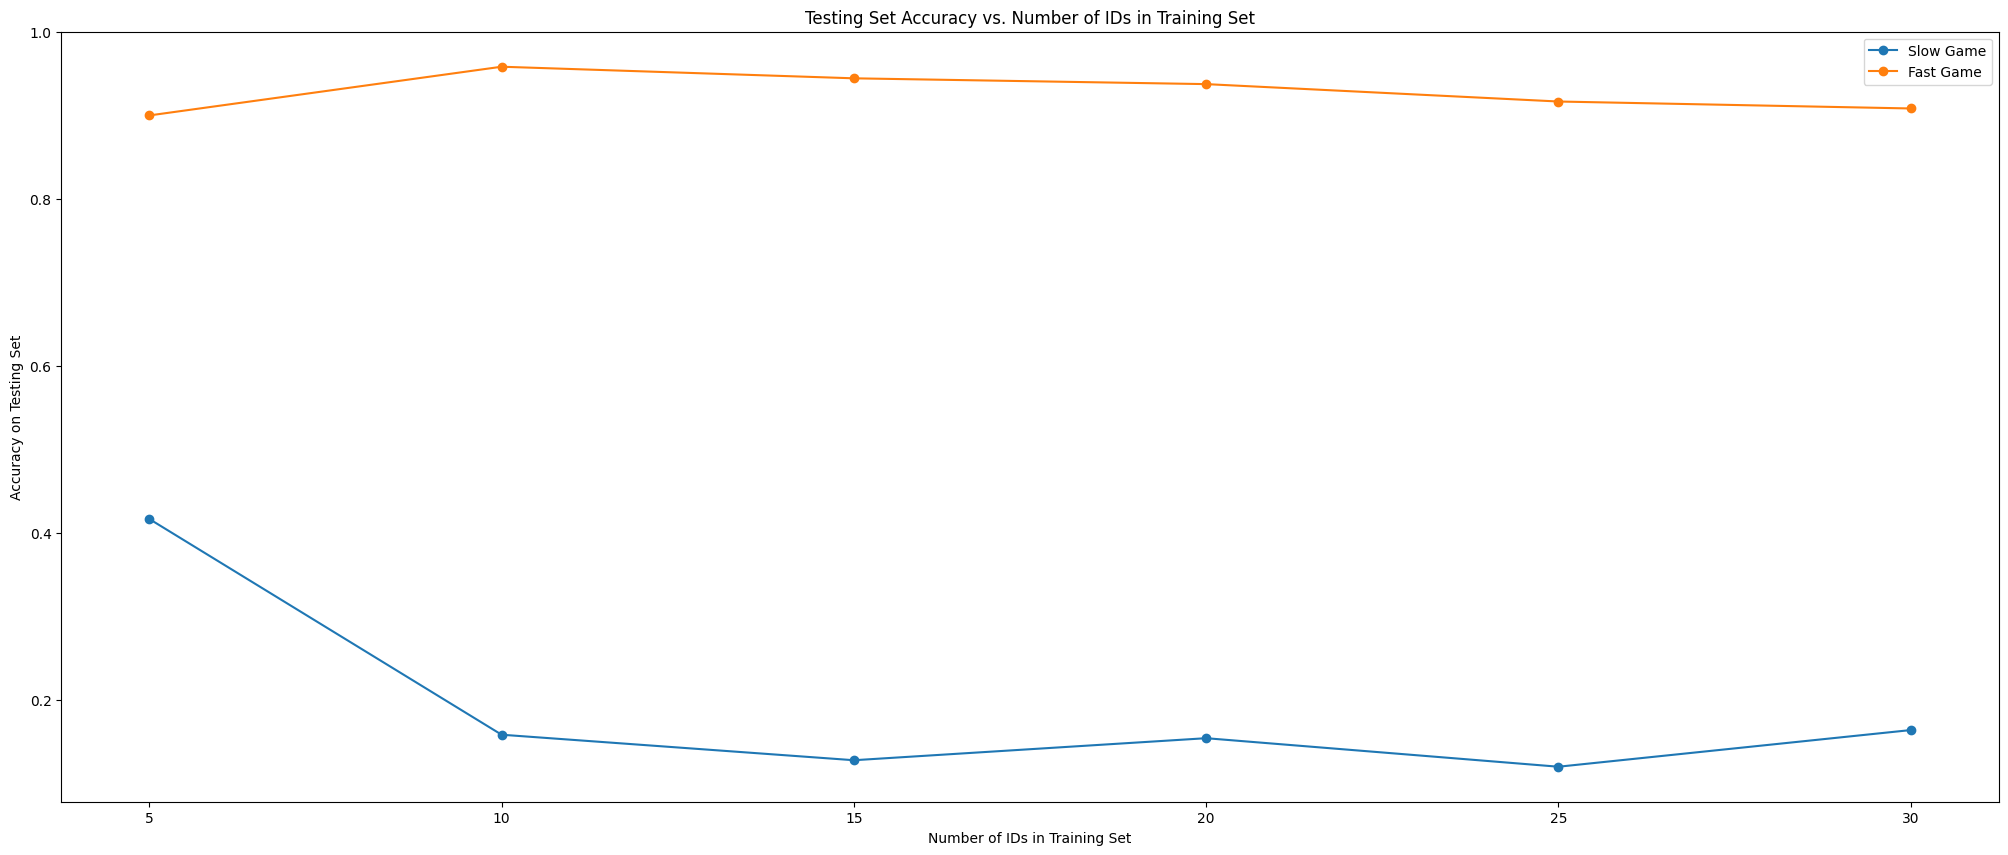


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,0.416667,0.900000
1,10,0.158333,0.958333
2,15,0.127778,0.944444
3,20,0.154167,0.937500
4,25,0.120000,0.916667
5,30,0.163889,0.908333


In [33]:
evaluator.accuracy_over_ids(fX_train, fy_train,best_model_fast_name, X_test, y_test,fX_test, fy_test)